## Importing libraries

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

## Importing data

In [16]:
# Importing the data
hour_df = pd.read_csv("../dataset/Bike-Sharing-Dataset/hour.csv")

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [81]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Preprocessing

In [18]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [19]:
###########################
# Setting proper data types
###########################
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

### Plotting

[Text(0.5,1,'Season wise hourly distribution of counts')]

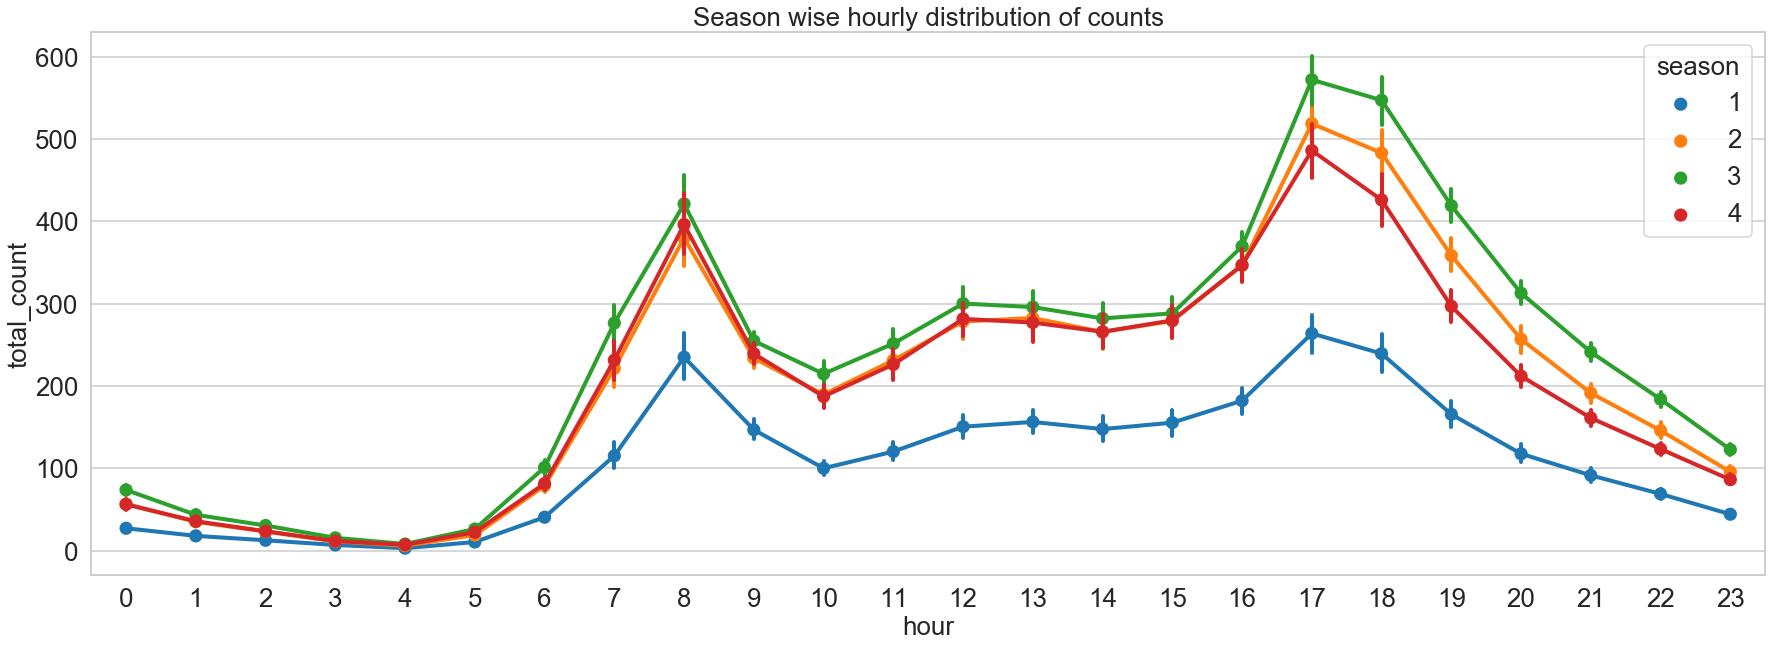

In [20]:
# Configuring plotting visual and sizes
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

#hr : hour (0 to 23)
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'total_count',
                           'season']],
              x='hour',
              y='total_count',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of counts")


[Text(0.5,1,'Weekday wise hourly distribution of counts')]

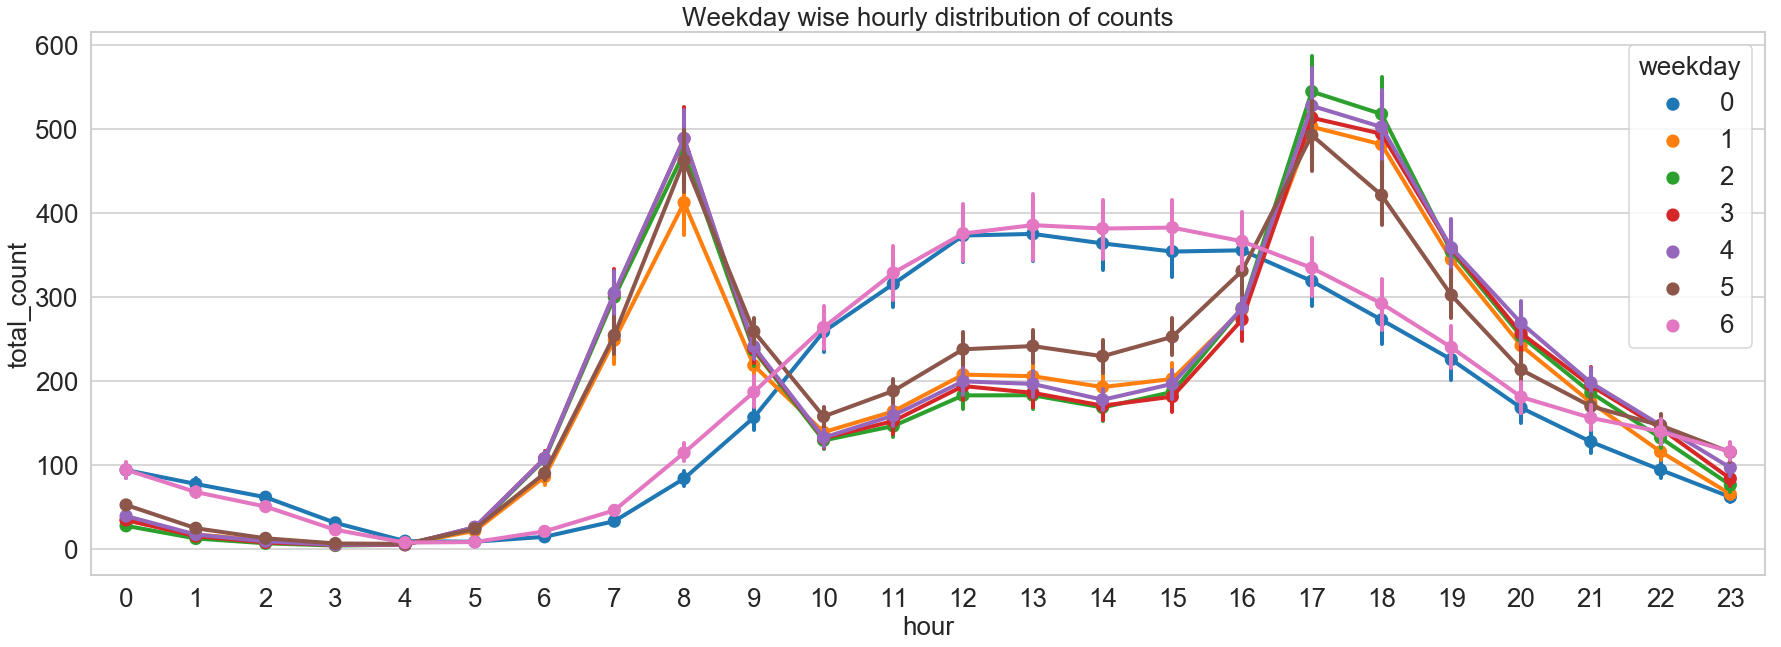

In [27]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'total_count',
                           'weekday']],
              x='hour',
              y='total_count',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")


[Text(0.5,1,'Monthly distribution of counts')]

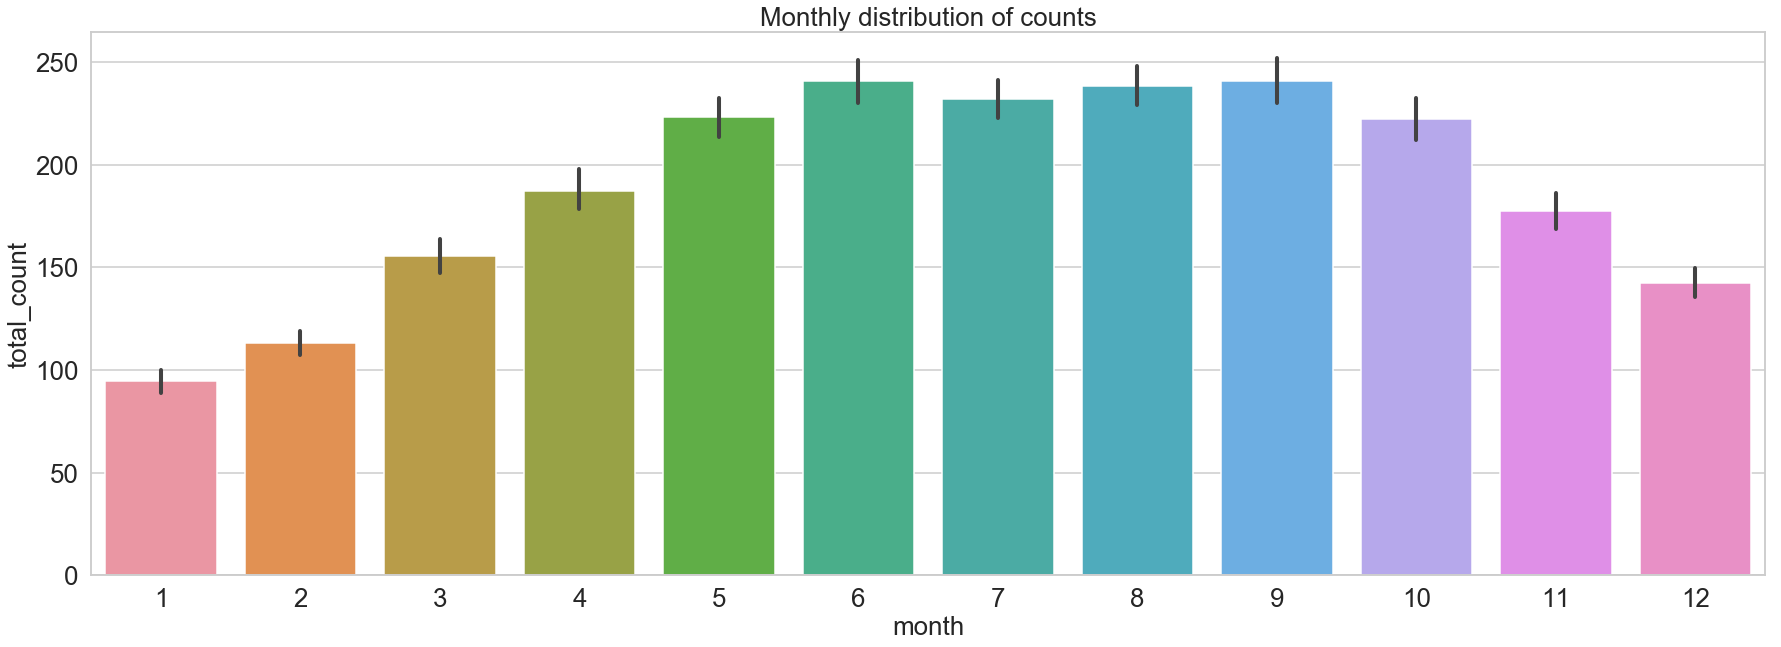

In [26]:
#mnth : month ( 1 to 12)
fig,ax = plt.subplots()
sns.barplot(data=hour_df[['month',
                           'total_count']],
              x='month',
              y='total_count',
              ax=ax)
ax.set(title="Monthly distribution of counts")

[Text(0.5,1,'Season distribution of counts')]

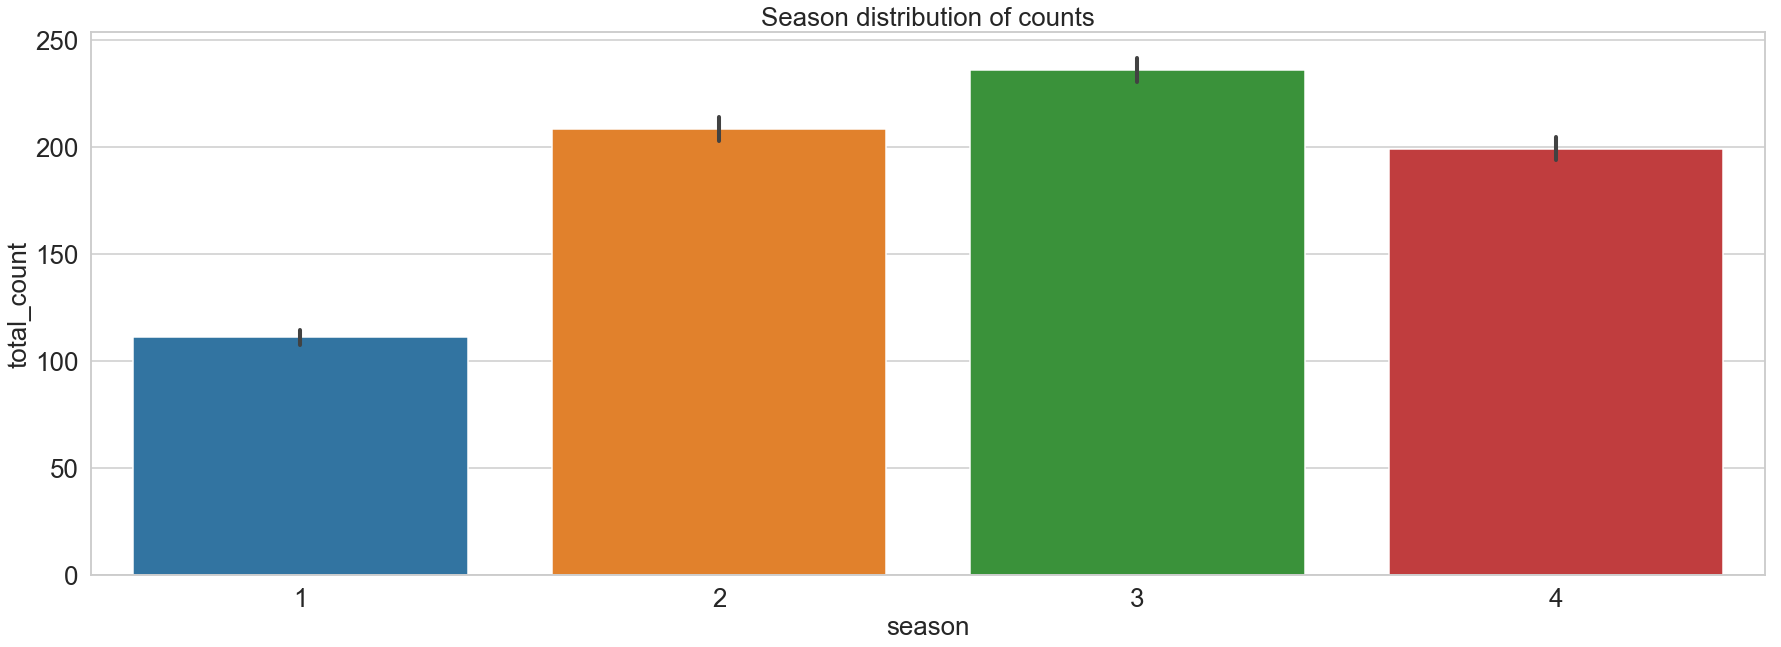

In [28]:
# season : season (1:springer, 2:summer, 3:fall, 4:winter)

fig, ax = plt.subplots()
sns.barplot(data=hour_df[['season',
                           'total_count']],
              x='season',
              y='total_count',
              ax=ax)
ax.set(title="Season distribution of counts")

[Text(0.5,1,'Year distribution of counts')]

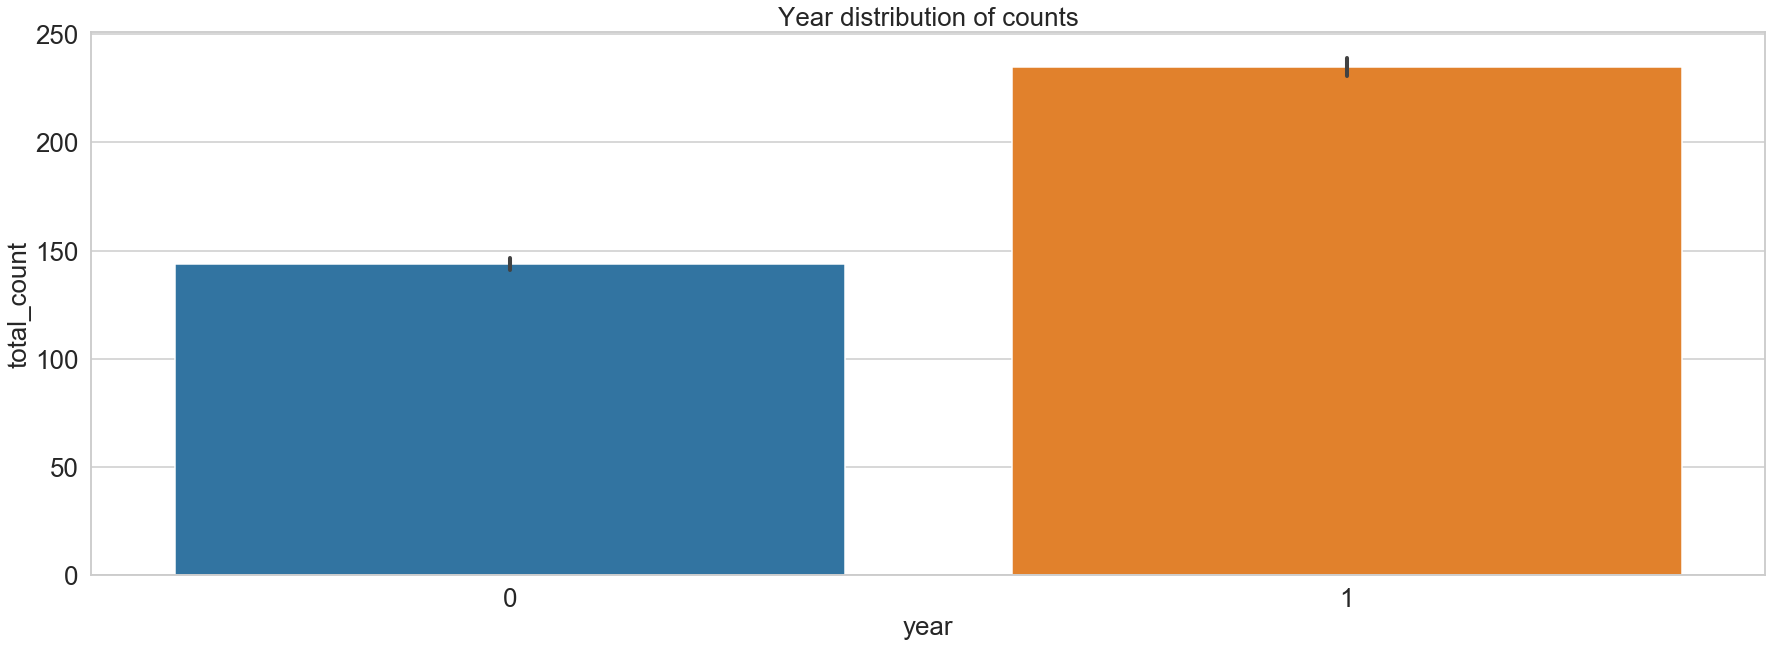

In [30]:
# yr : year (0: 2011, 1:2012)

fig, ax = plt.subplots()
sns.barplot(data=hour_df[['year',
                           'total_count']],
              x='year',
              y='total_count',
              ax=ax)
ax.set(title="Year distribution of counts")

[Text(0.5,1,'Year distribution of counts')]

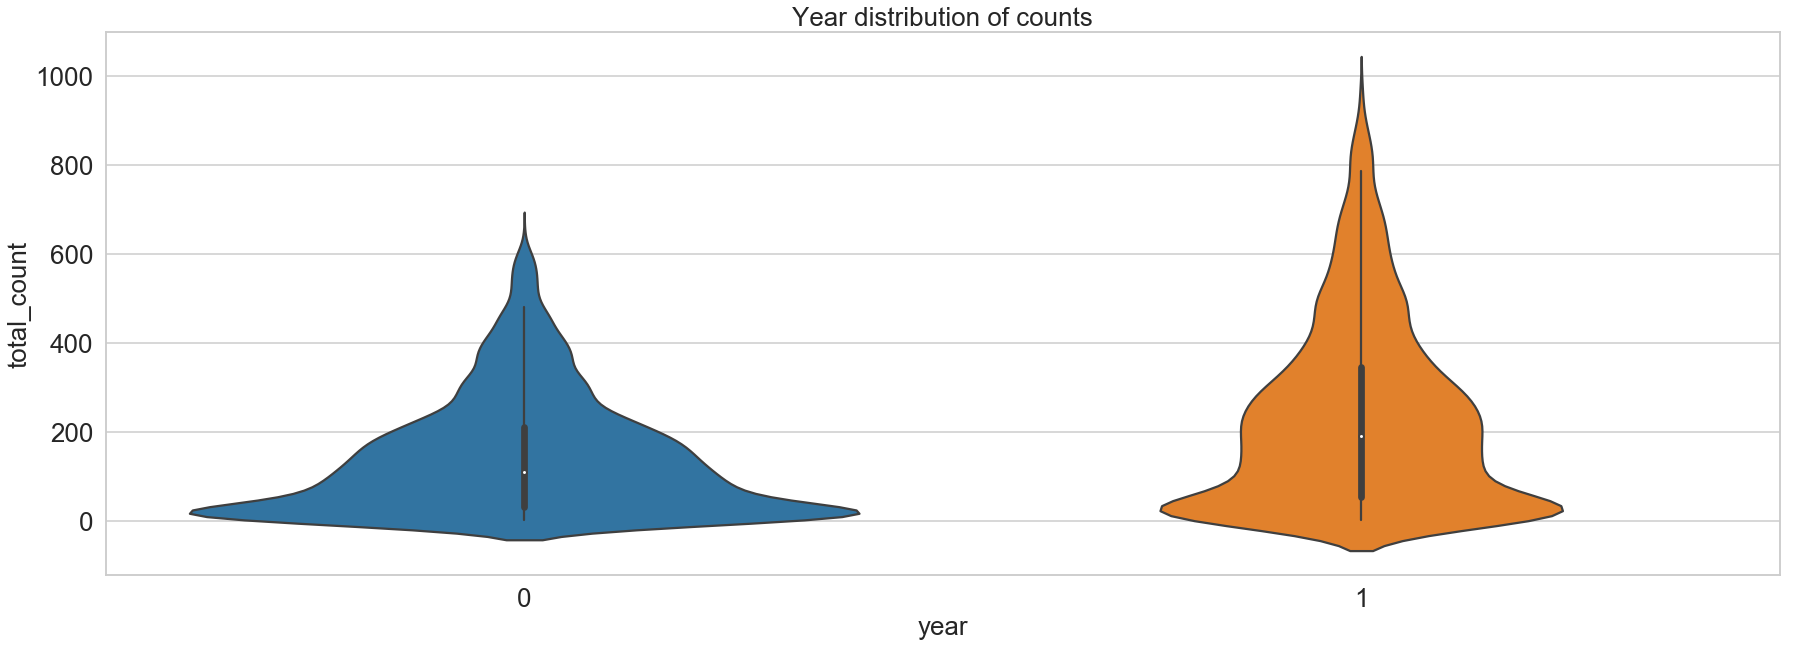

In [32]:
fig,ax = plt.subplots()
sns.violinplot(data=hour_df[['year',
                           'total_count']],
              x='year',
              y='total_count',
              ax=ax)
ax.set(title="Year distribution of counts")

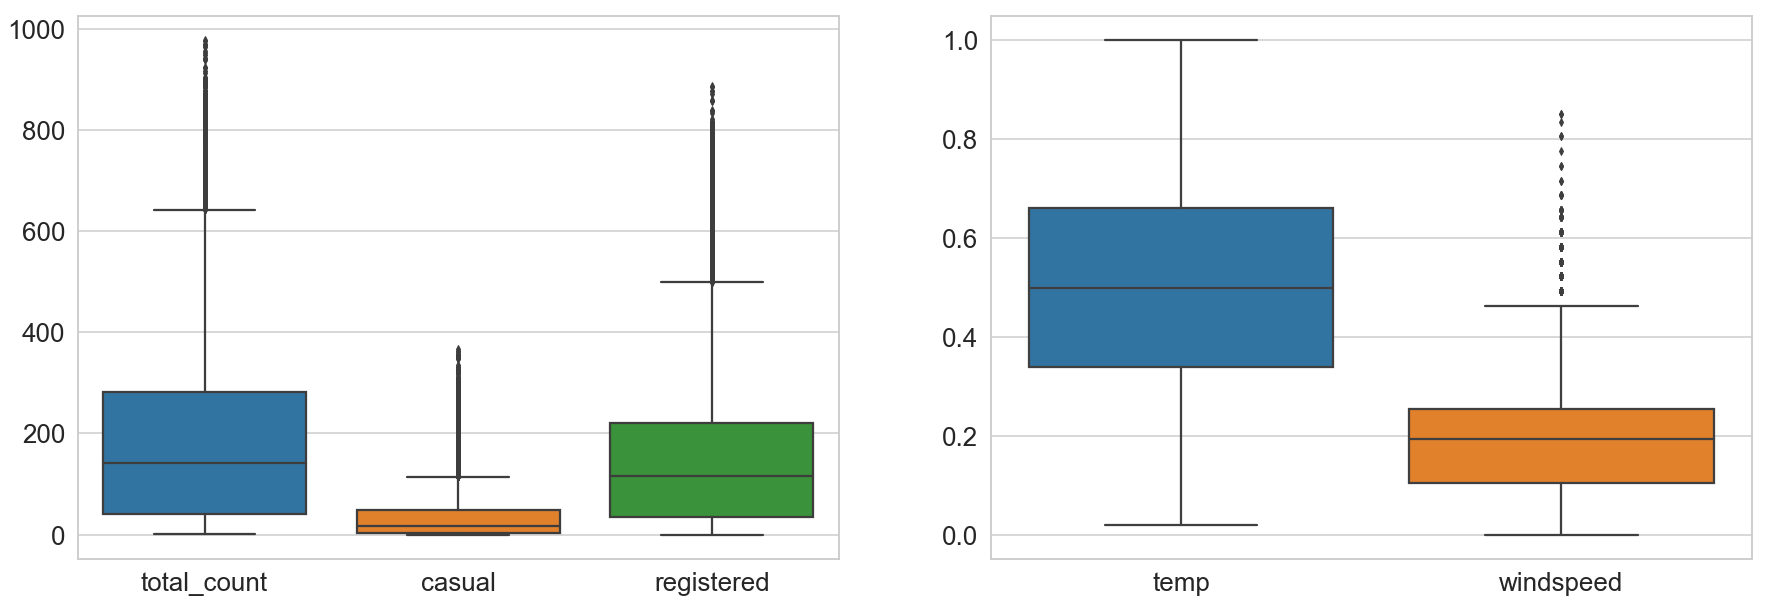

In [33]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(data=hour_df[['total_count',
                          'casual',
                          'registered']],ax=ax1)
sns.boxplot(data=hour_df[['temp',
                          'windspeed']],ax=ax2)

[Text(0.5,1,'Checking for outliners in day hours')]

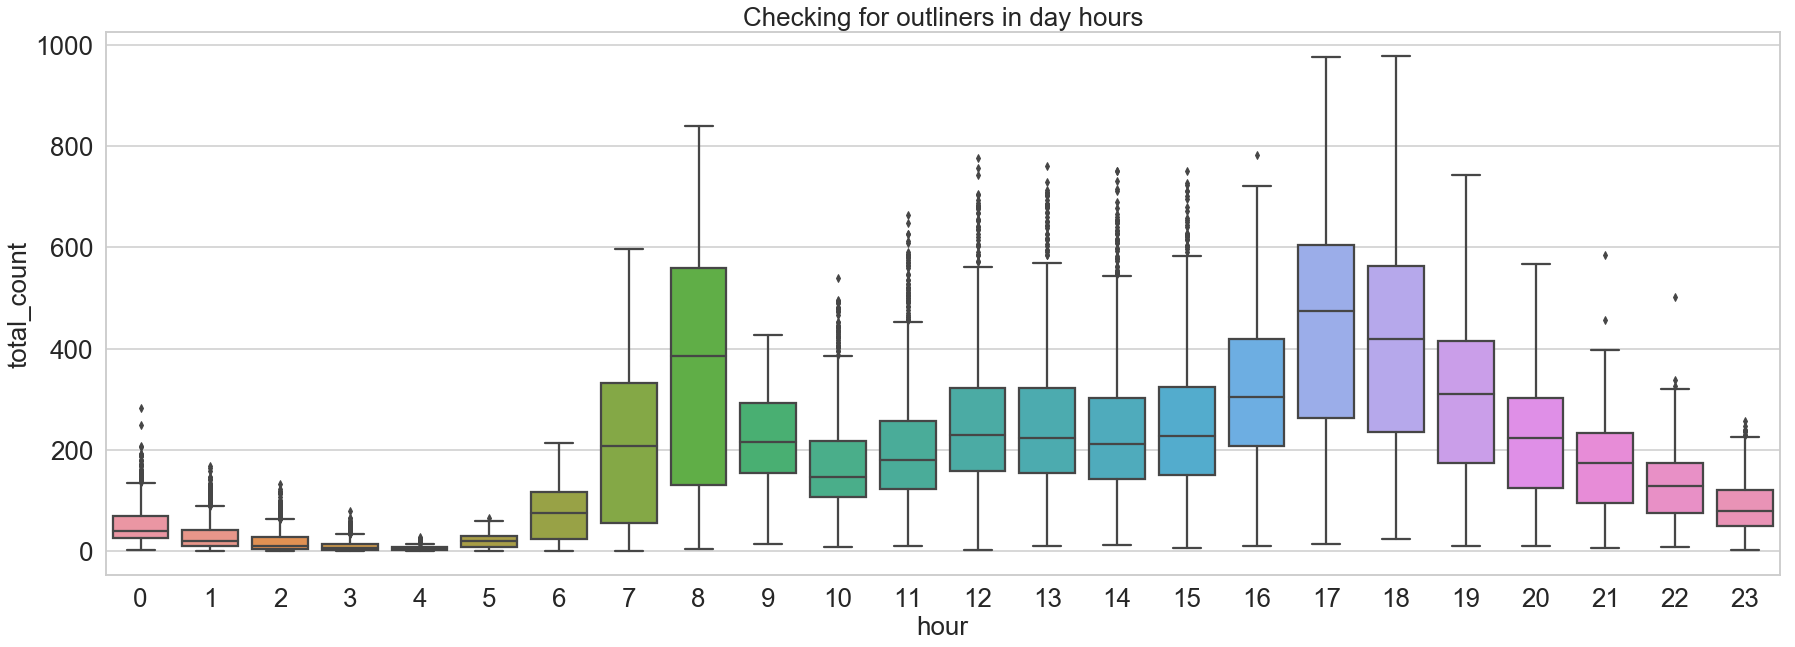

In [34]:
fig,ax = plt.subplots()
sns.boxplot(data=hour_df[['total_count',
                          'hour']],x='hour',y='total_count',ax=ax)
ax.set(title="Checking for outliners in day hours")

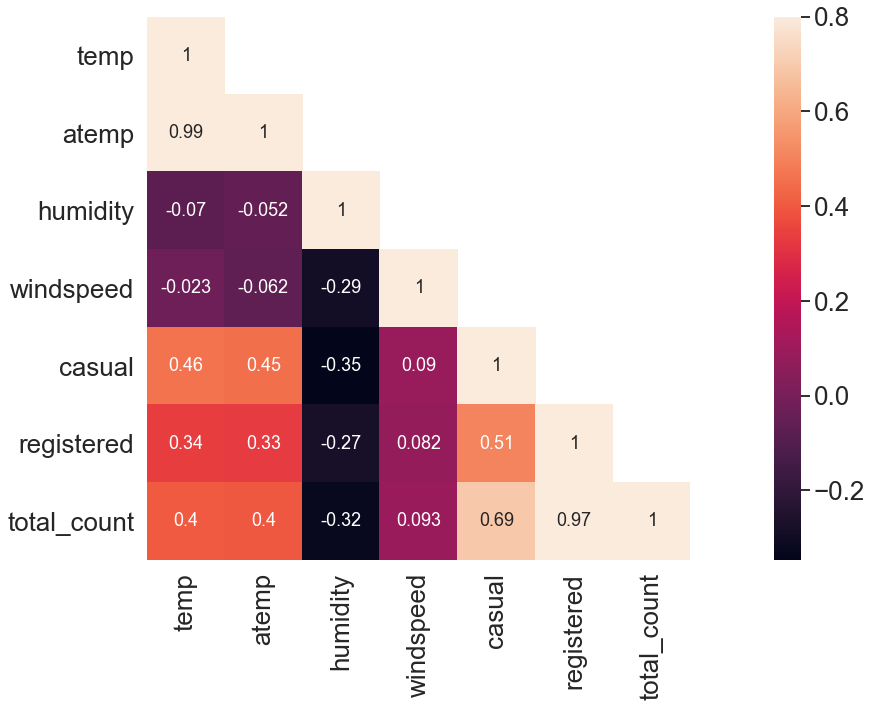

In [35]:
corrMatt = hour_df[['temp',
                    'atemp', 
                    'humidity', 
                    'windspeed', 
                    'casual', 
                    'registered', 
                    'total_count']].corr()

mask = np.array(corrMatt)
# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

### Feature Engineering

In [36]:
# Defining categorical variables encoder method
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
column.
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded
    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series
    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return le,ohe,features_df

# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

In [37]:
# Divide the dataset into training and testing sets
X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3],
                                        hour_df.iloc[:,-1],
                                        test_size=0.33,
                                        random_state=42)
X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

In [39]:
X.shape

(11643, 15)

In [40]:
# Encoding all the categorical features
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
# though we have transformed all categoricals into their one-hot encodings, note that ordinal
# attributes such as hour, weekday, and so on do not require such encoding.
numeric_feature_cols = ['temp','humidity','windspeed',
                        'hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

###############
# Train dataset
###############
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})


feature_df_list  = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Train dataset shape::{}".format(train_df_new.shape))
print(train_df_new.head())

##############
# Test dataset
##############
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,
                                                              le,ohe,
                                                              col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Test dataset shape::{}".format(test_df_new.shape))
print(test_df_new.head())

Train dataset shape::(11643, 19)
   temp  humidity  windspeed hour weekday month year  season_1  season_2  \
0  0.64      0.65     0.1940    0       5     9    0       0.0       0.0   
1  0.50      0.45     0.2239   13       2     3    0       0.0       1.0   
2  0.86      0.47     0.5224   12       0     8    1       0.0       0.0   
3  0.30      0.61     0.0000    2       3     2    1       1.0       0.0   
4  0.54      0.19     0.4179   17       6     4    1       0.0       1.0   

   season_3  season_4  is_holiday_0  is_holiday_1  weather_condition_1  \
0       1.0       0.0           1.0           0.0                  1.0   
1       0.0       0.0           1.0           0.0                  1.0   
2       1.0       0.0           1.0           0.0                  1.0   
3       0.0       0.0           1.0           0.0                  1.0   
4       0.0       0.0           1.0           0.0                  1.0   

   weather_condition_2  weather_condition_3  weather_condition_4 

In [41]:
X = train_df_new
y = y.total_count.values.reshape(-1,1)

lin_reg = linear_model.LinearRegression()

# using the k-fold cross validation (specifically 10-fold) to reduce overfitting affects
# cross_val_predict function returns cross validated prediction values as fitted by the model object.
predicted = cross_val_predict(lin_reg, X, y, cv=10)

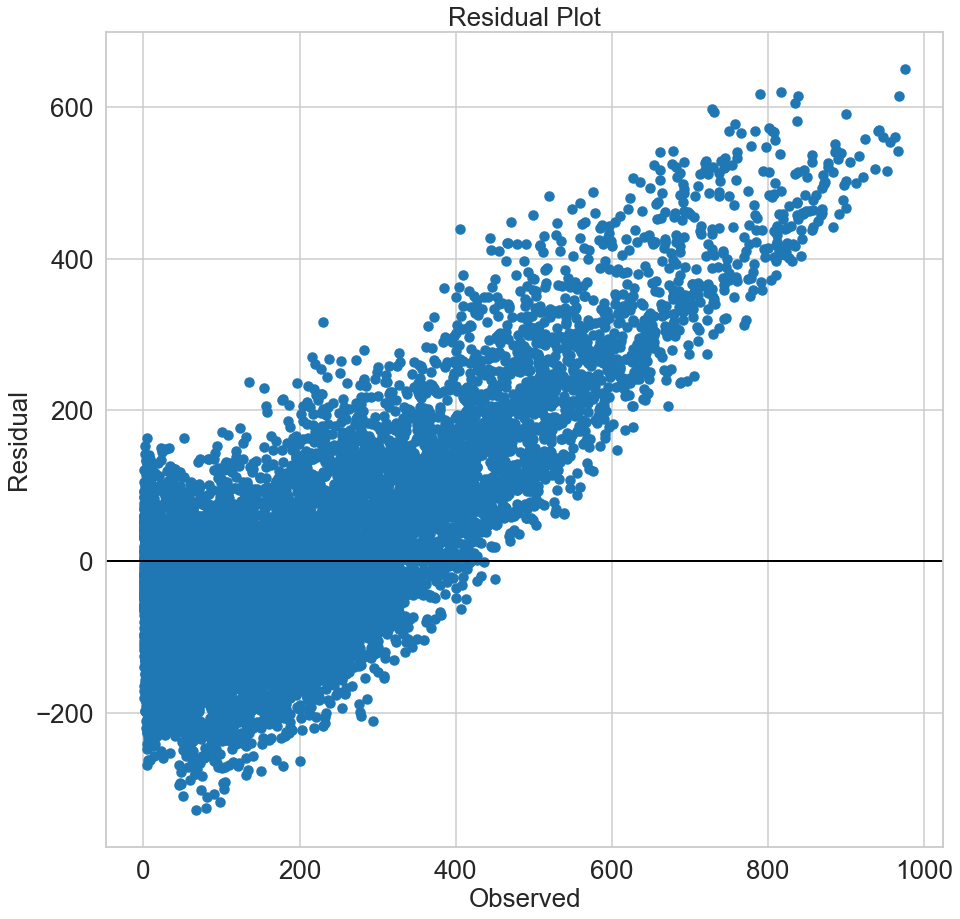

In [42]:
# Analysing residuals in our predictinos
fig,ax = plt.subplots(figsize=(15,15))
ax.scatter(y, y-predicted)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual Plot')
plt.show()

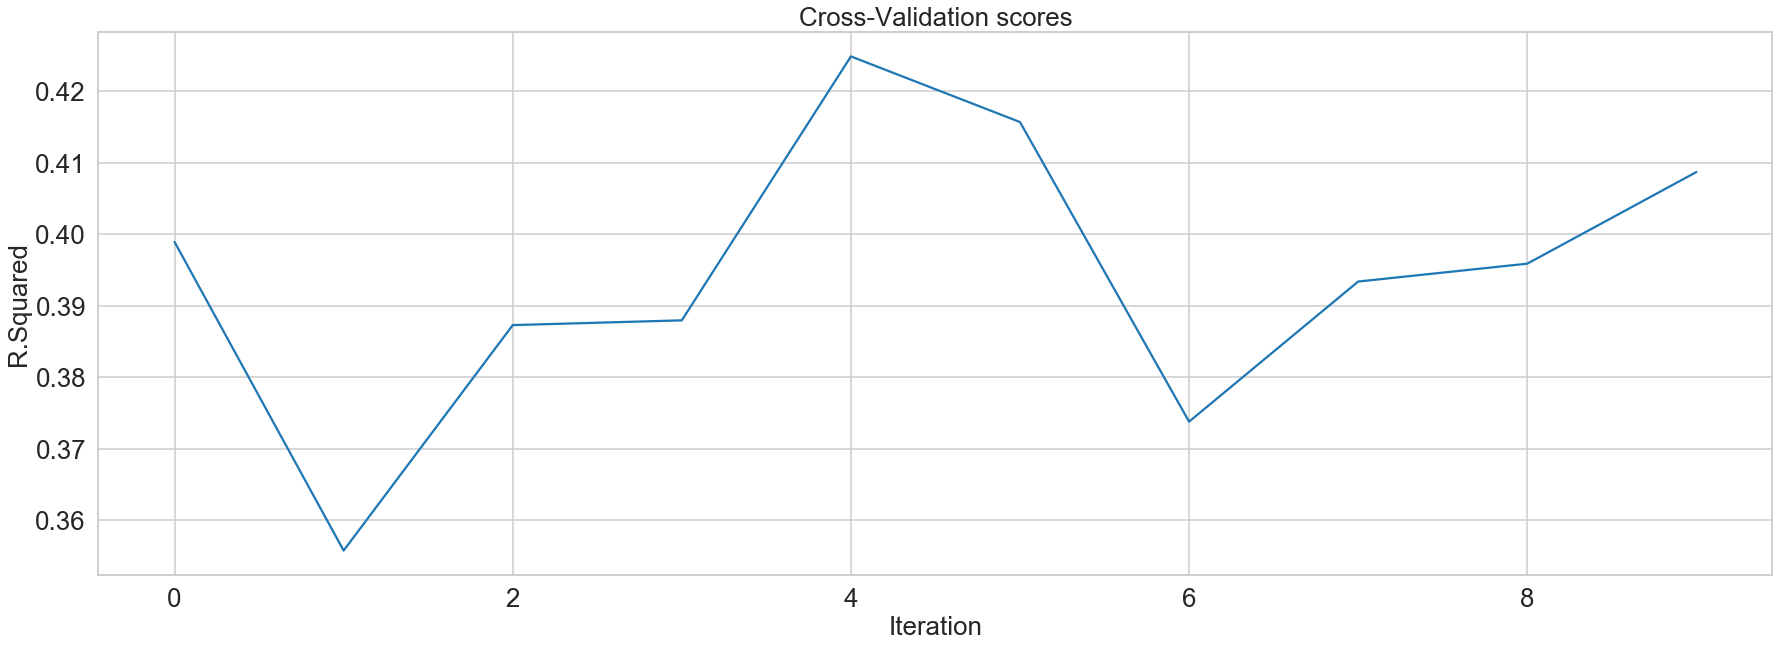

R-squared::[0.39894459 0.35575732 0.3873037  0.38796861 0.42489499 0.41571164
 0.37379762 0.39339864 0.39589746 0.40871611]
MSE::[-19612.38349313 -20800.77110185 -20256.54013607 -18545.99033804
 -18746.57816436 -21015.35560028 -21549.12876053 -21567.27946203
 -21044.42416385 -18899.05989574]


In [43]:
# Evaluating model in cross-validation iteration

r2_scores = cross_val_score(lin_reg, X, y, cv=10)
mse = cross_val_score(lin_reg, X, y, cv=10,scoring='neg_mean_squared_error')

fig,ax = plt.subplots()
ax.plot(range(0,10),
        r2_scores)
ax.set_xlabel('Iteration')
ax.set_ylabel('R.Squared')
ax.set_title('Cross-Validation scores')
plt.show()


print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse))

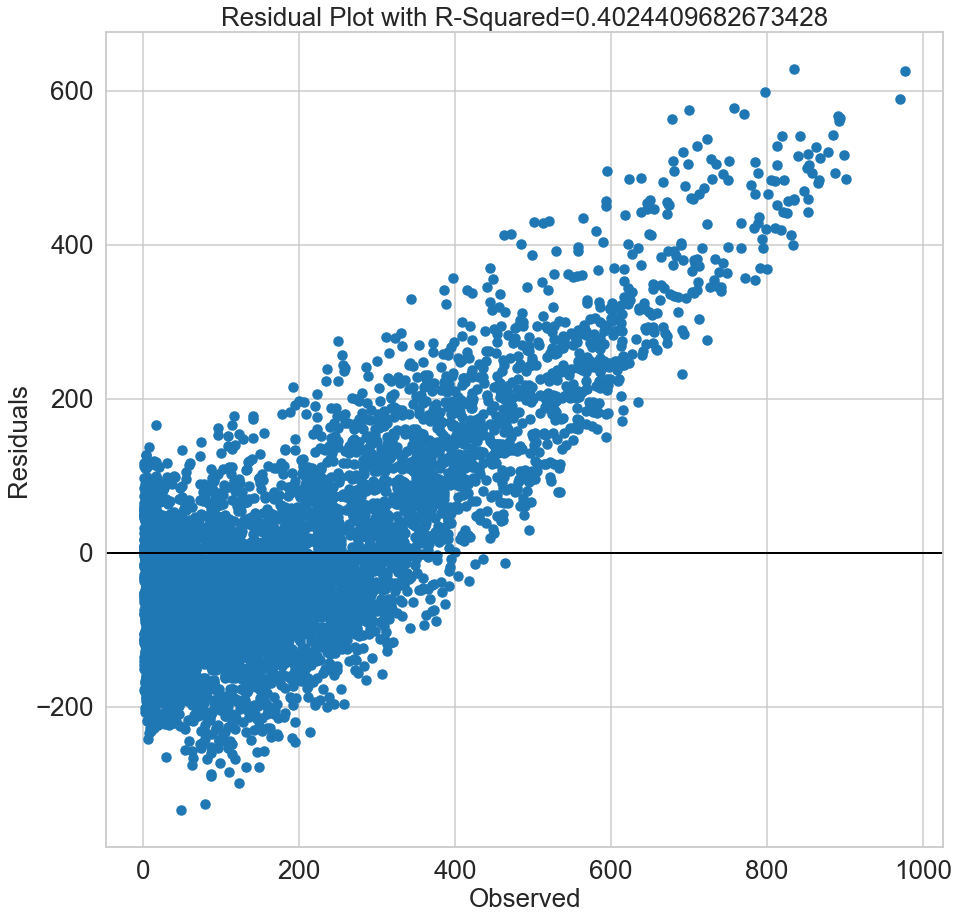

MSE: 19062.99975600927


In [44]:
# Predict model based on training dataset
lin_reg.fit(X,y)

# Constructing test dataset
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)


y_pred = lin_reg.predict(X_test)
residuals = y_test-y_pred

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot with R-Squared={}".format(np.average(lin_reg.score(X_test,y_test))))
plt.show()

print("MSE: {}".format(metrics.mean_squared_error(y_test, y_pred)))

In [46]:
y_pred[:5]

array([[440.22912555],
       [193.65636062],
       [ 64.13154566],
       [410.99620449],
       [-18.30048879]])

In [47]:
y_test[:5]

array([[425],
       [ 88],
       [  4],
       [526],
       [ 13]], dtype=int64)

In [48]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


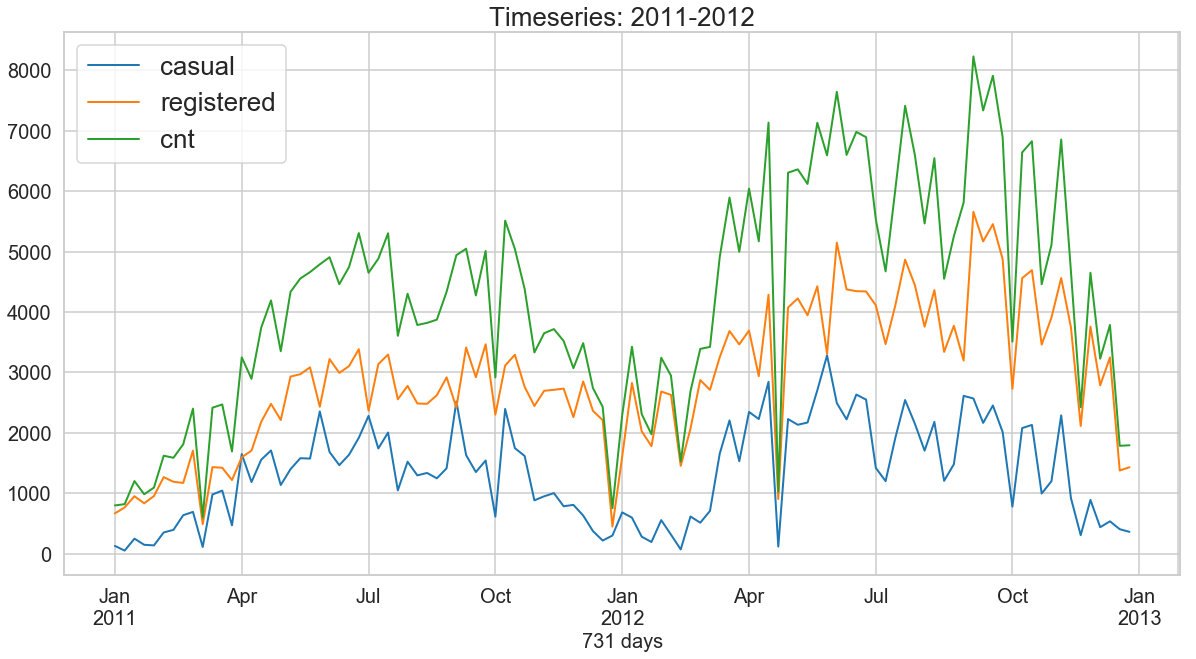

temp


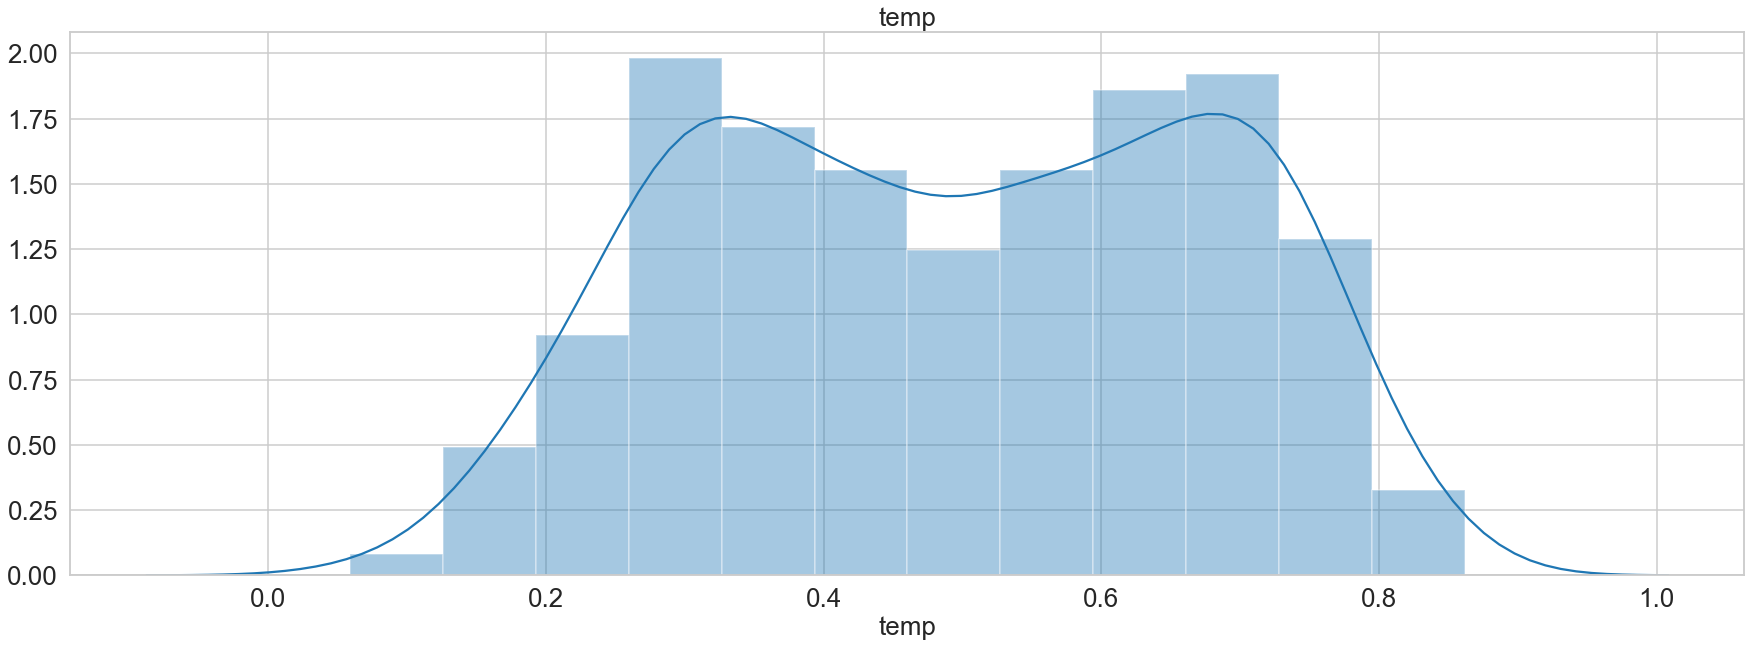

atemp


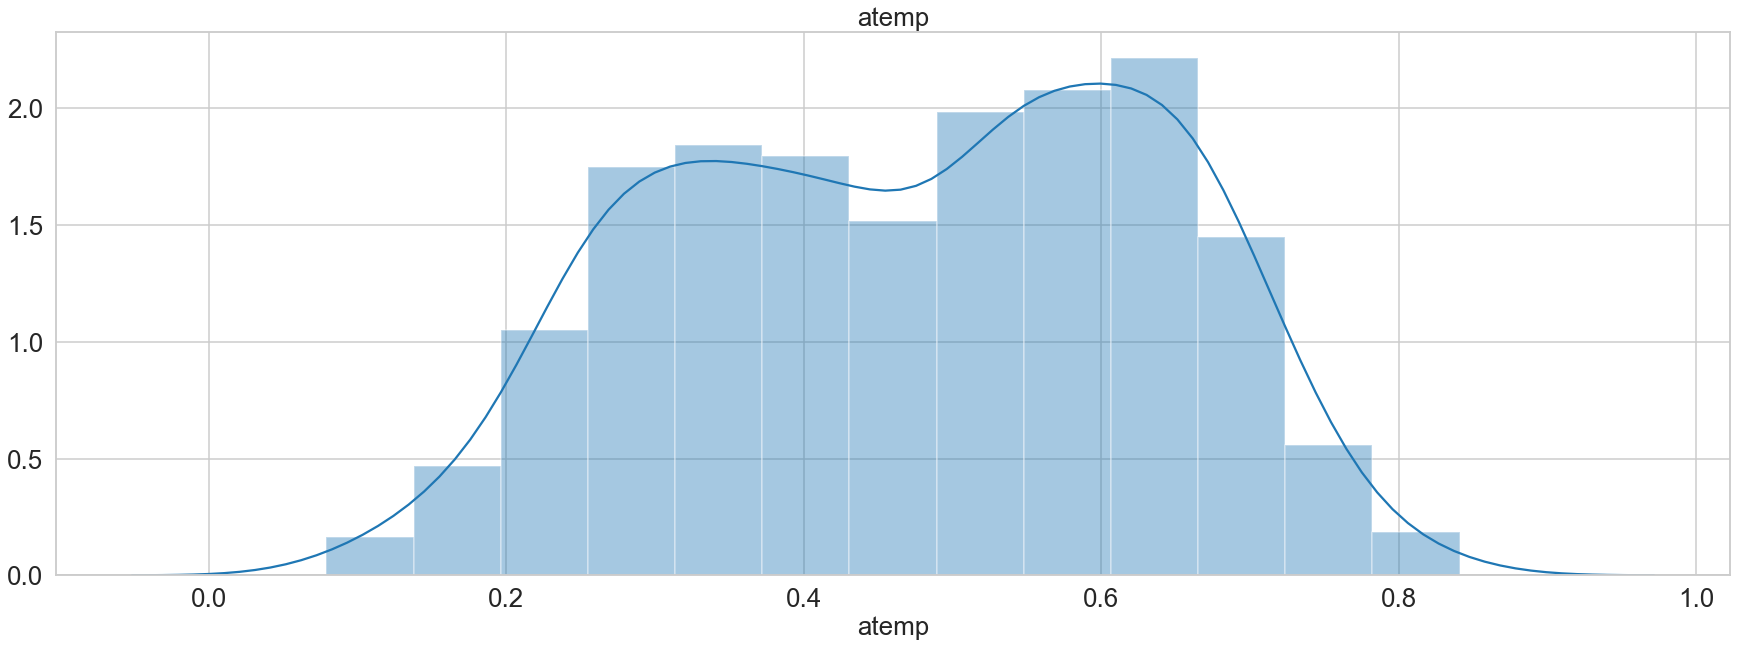

hum


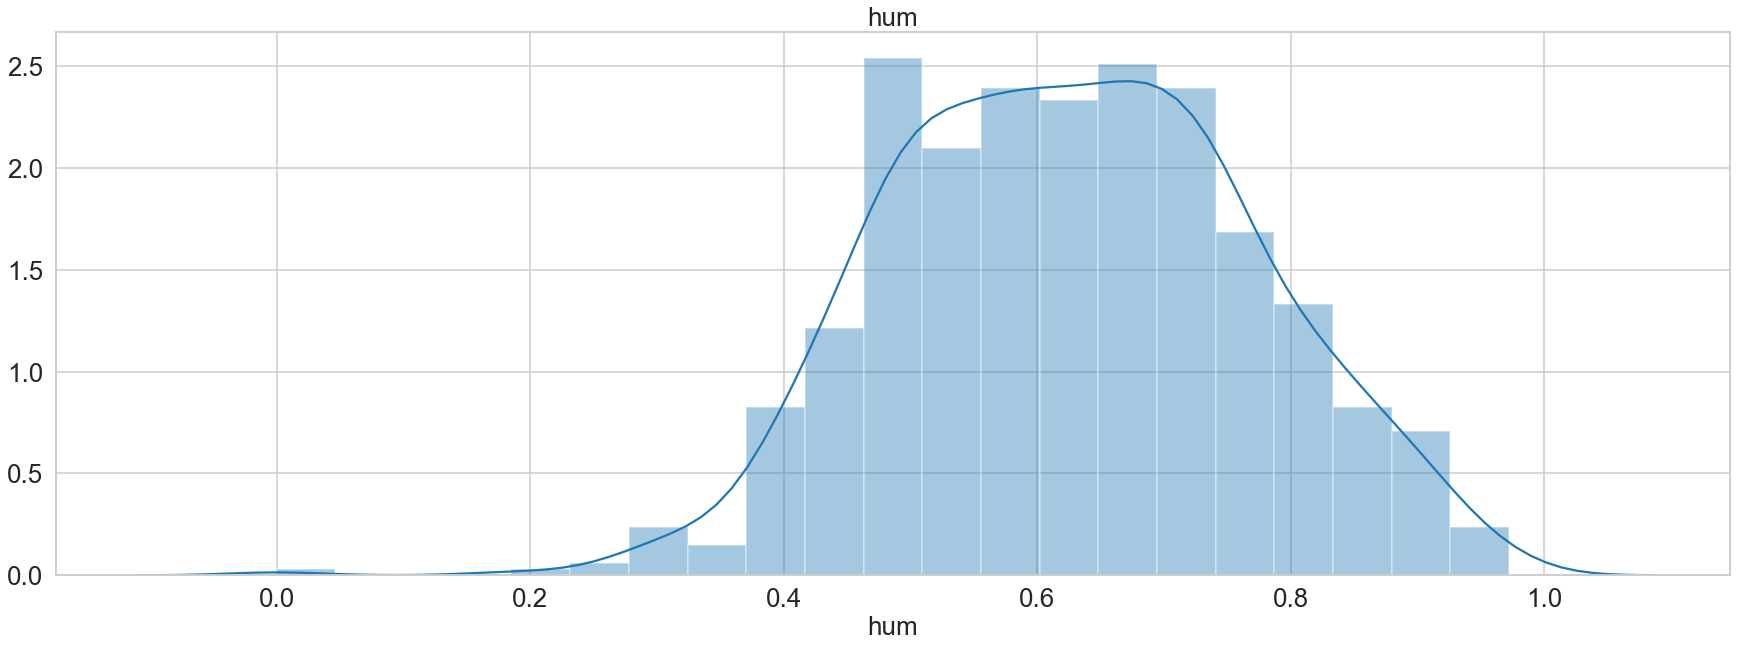

windspeed


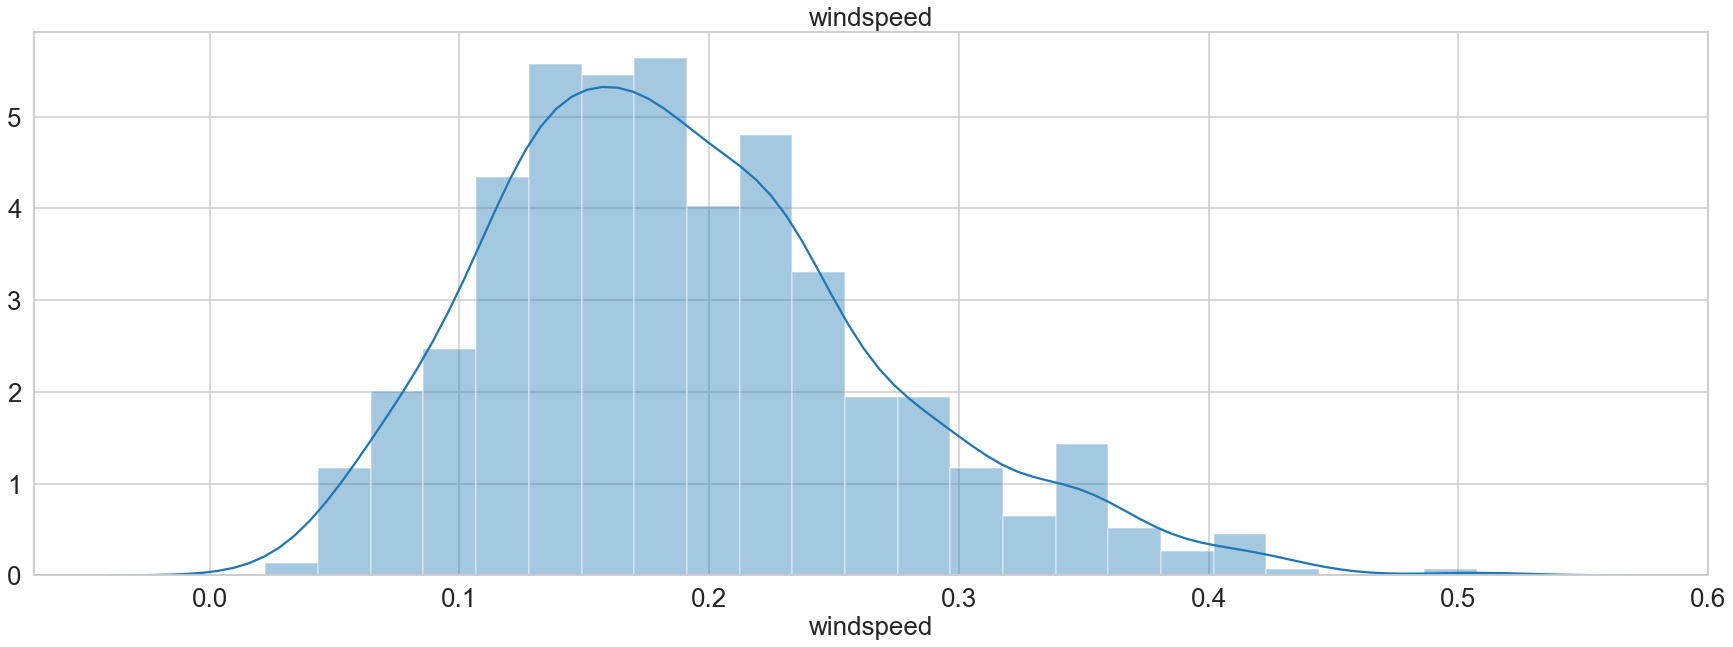

temp


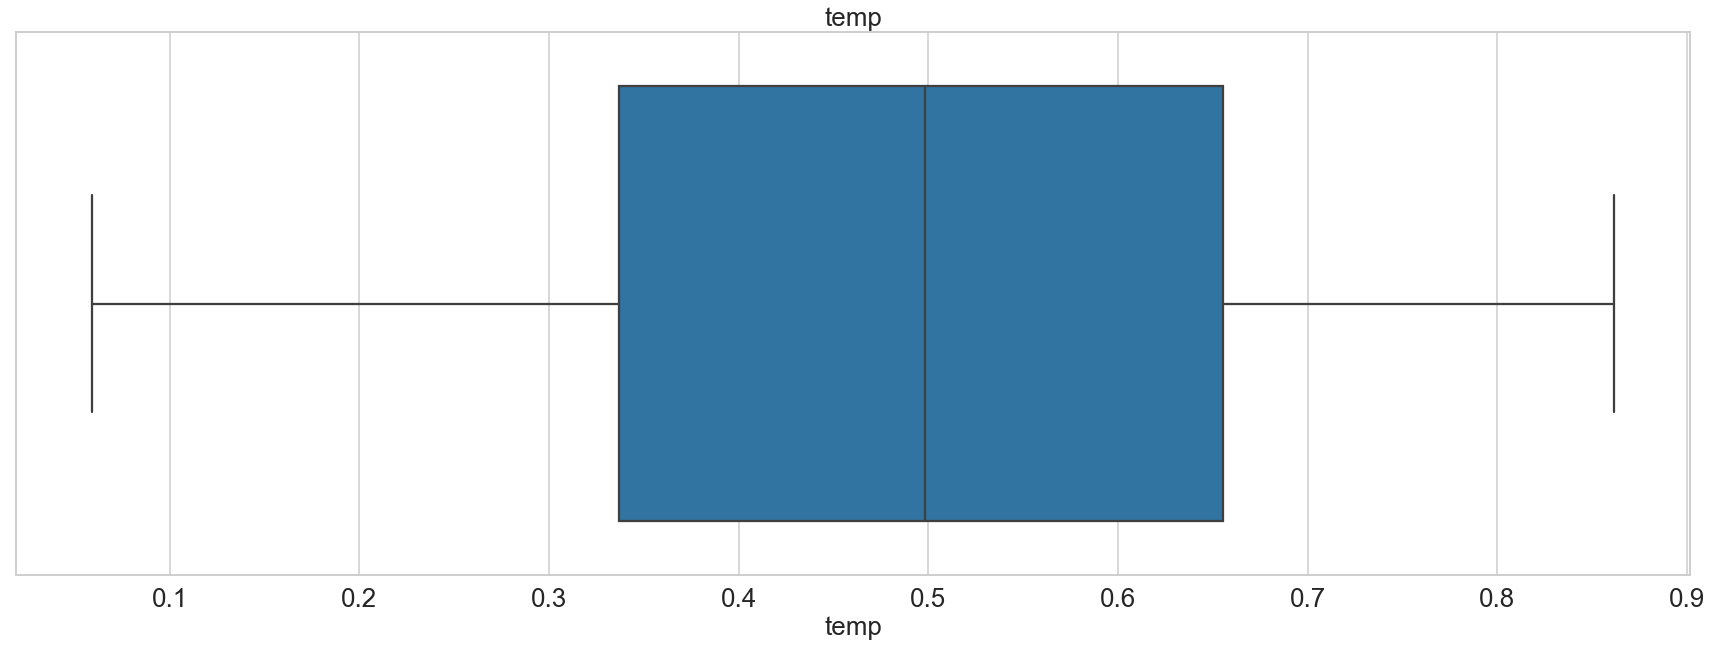

atemp


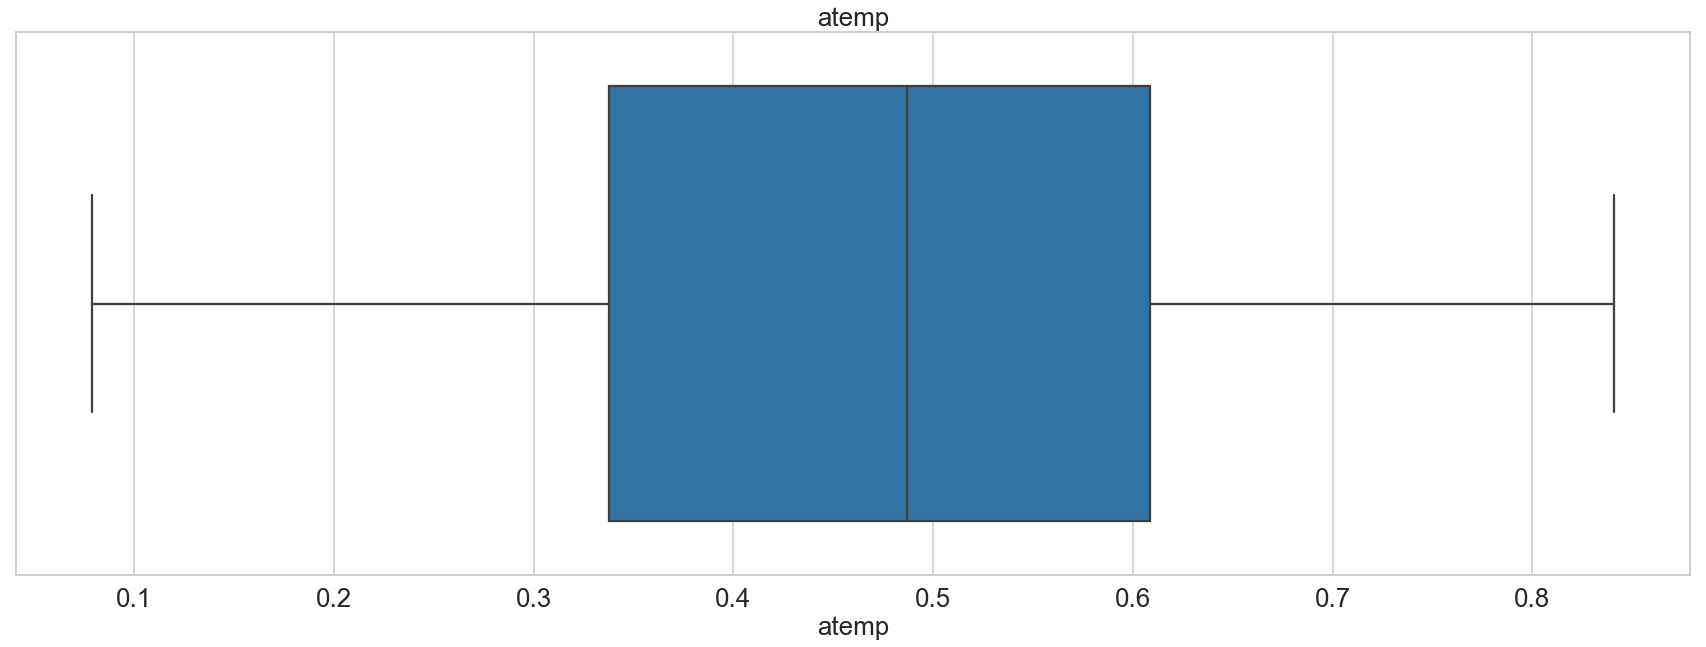

hum


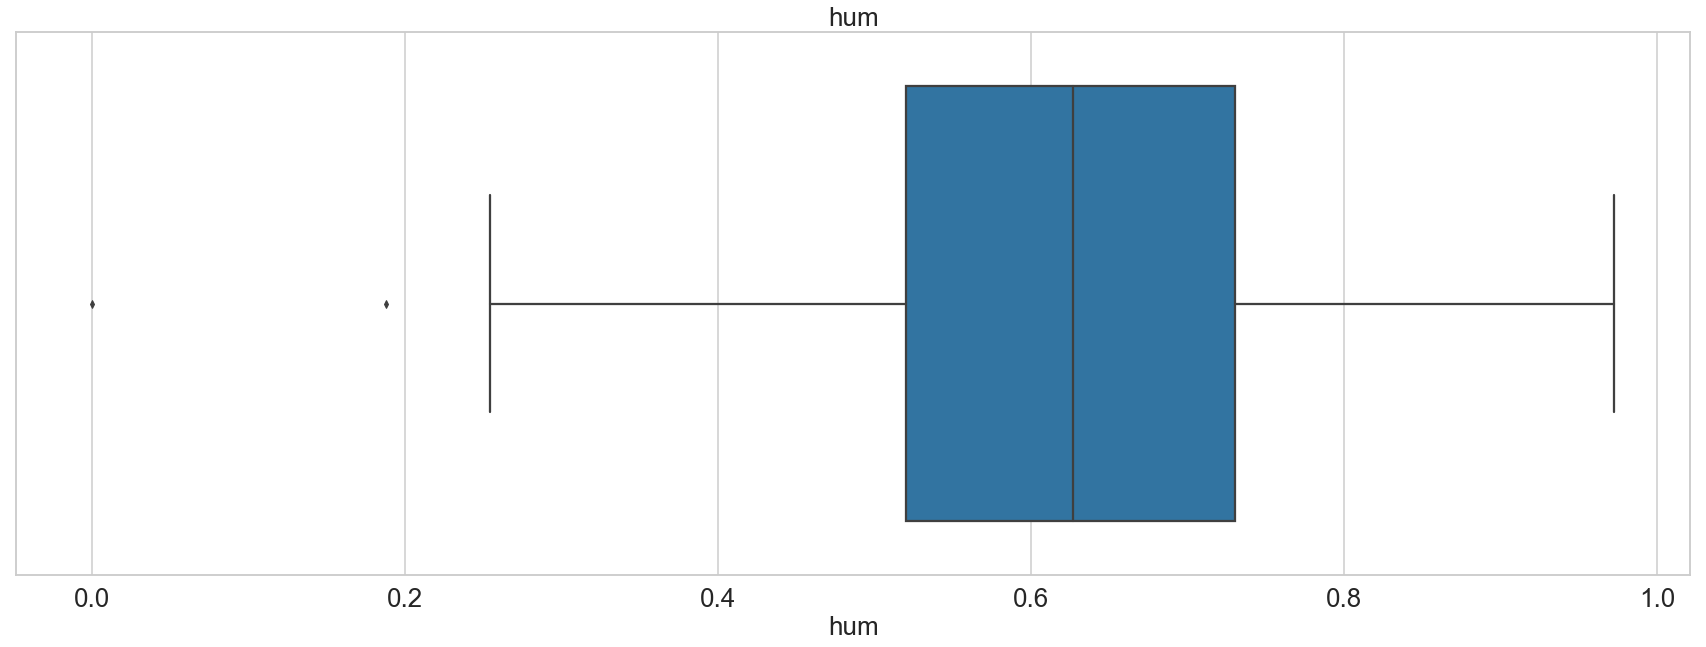

windspeed


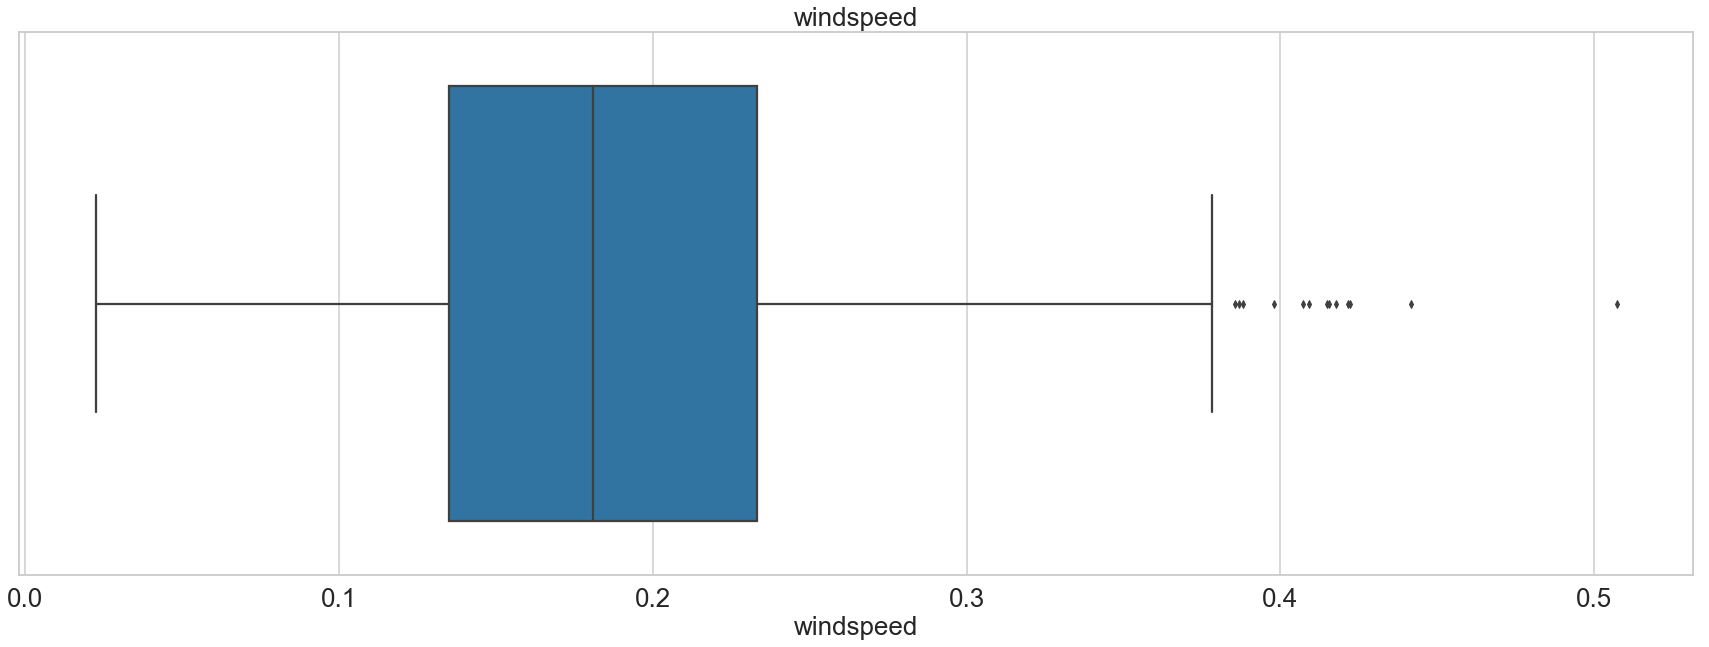

temp
0
atemp
0
hum
2
windspeed


C:\Users\nle5257\projects\.vritualenv\win_virtualenv\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


15
temp


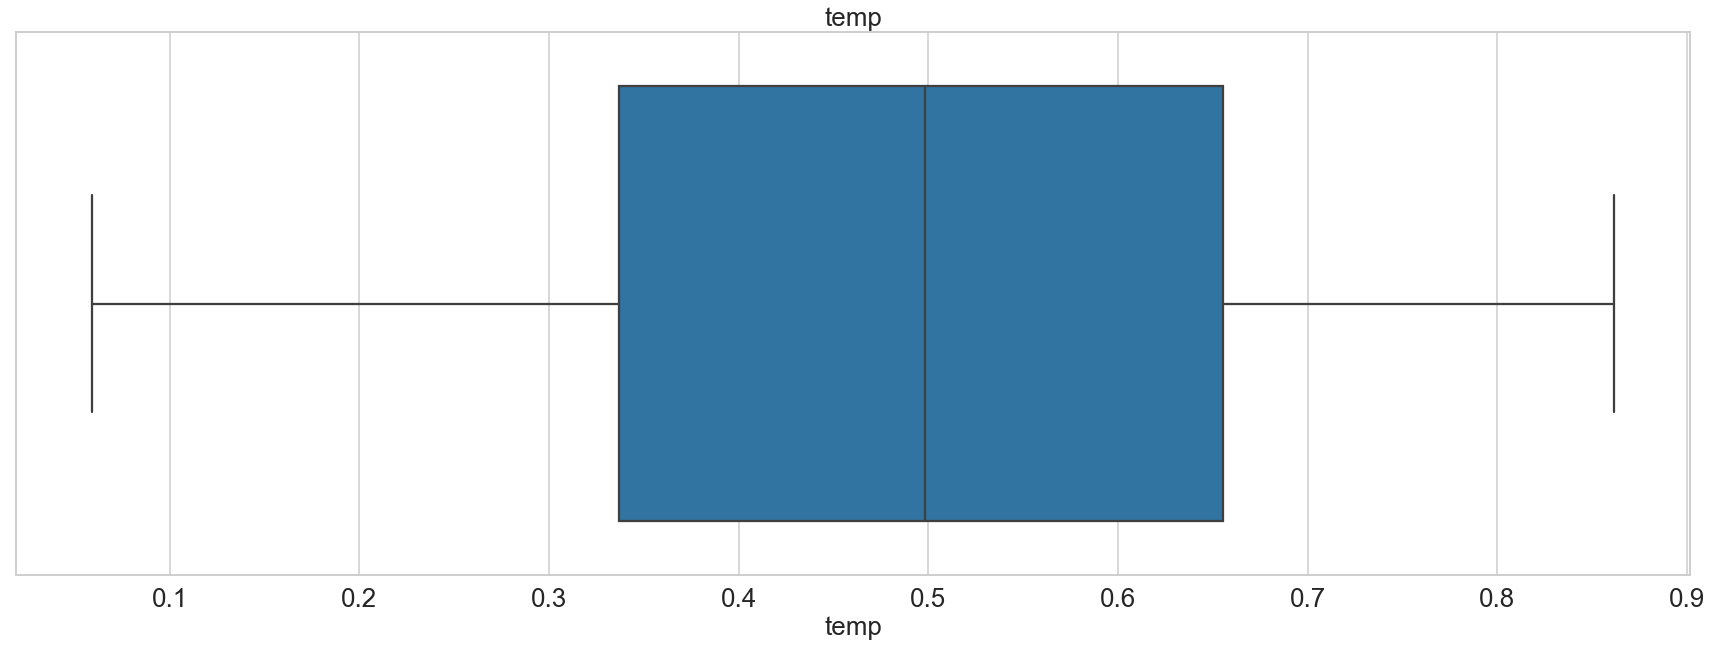

atemp


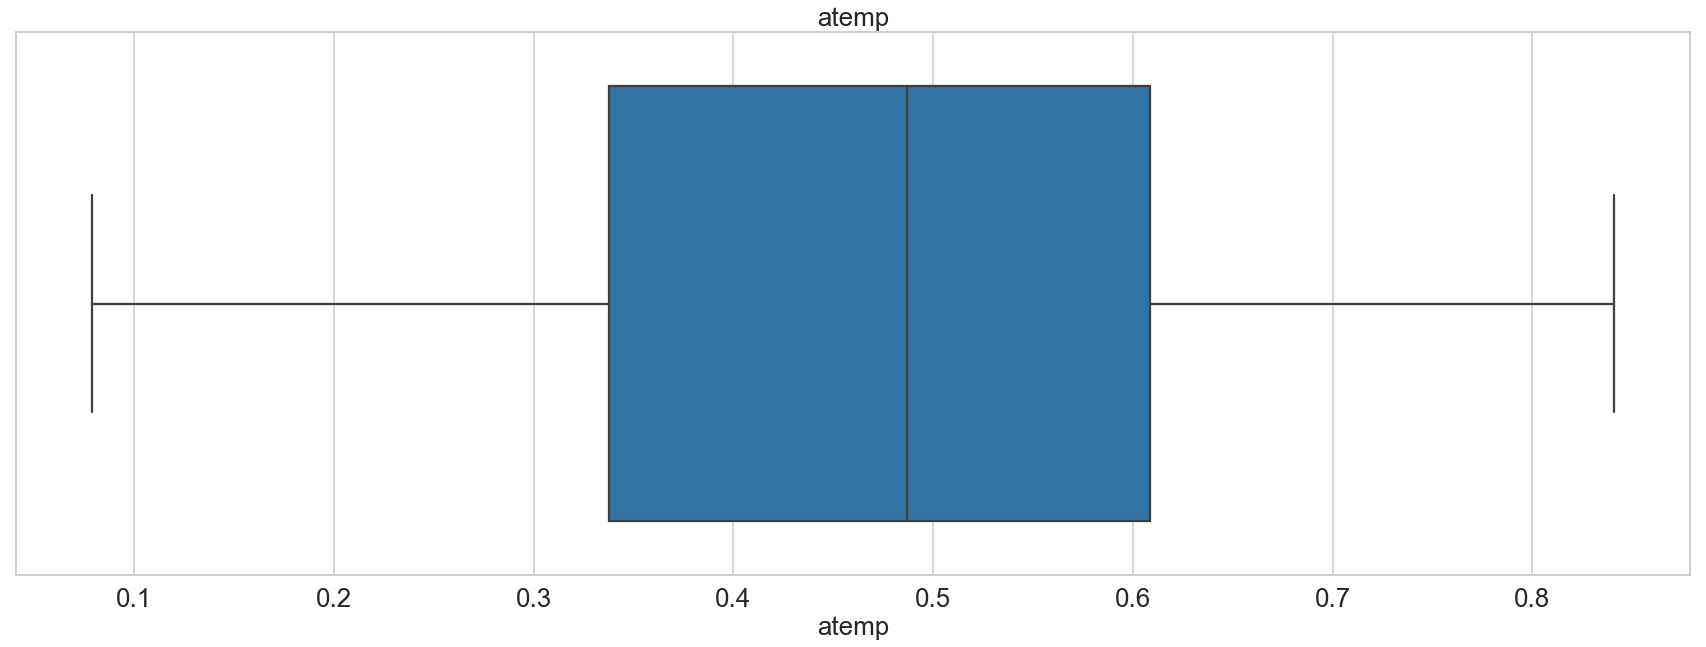

hum


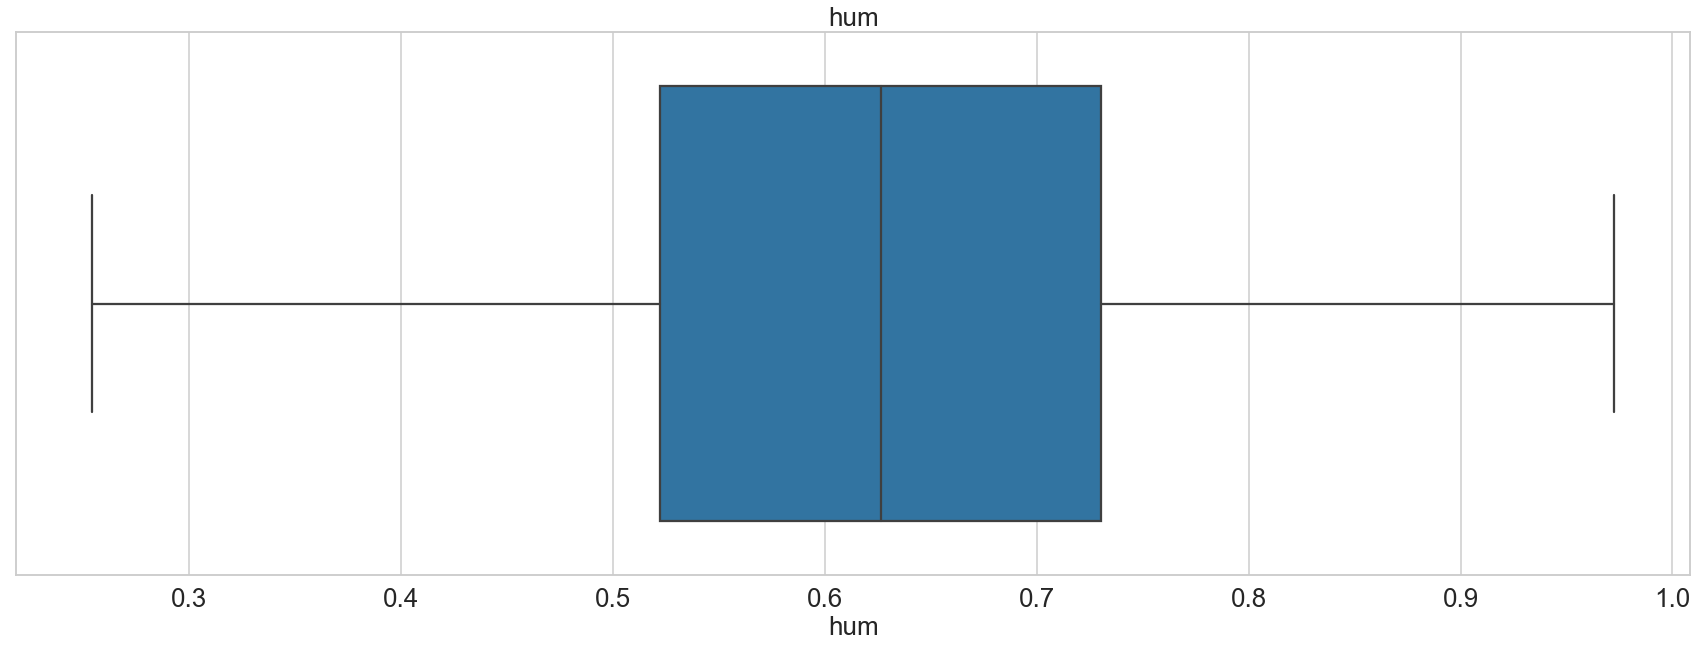

windspeed


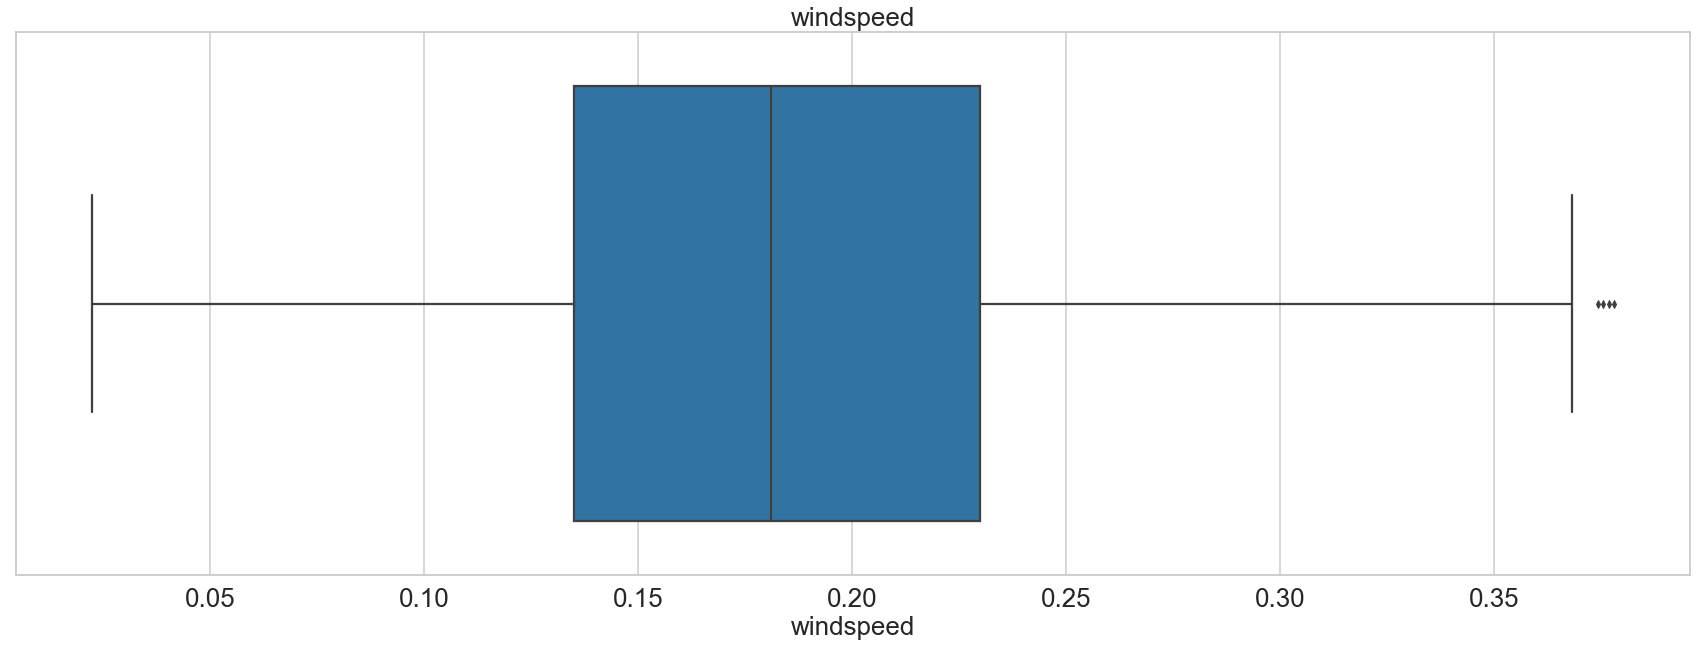

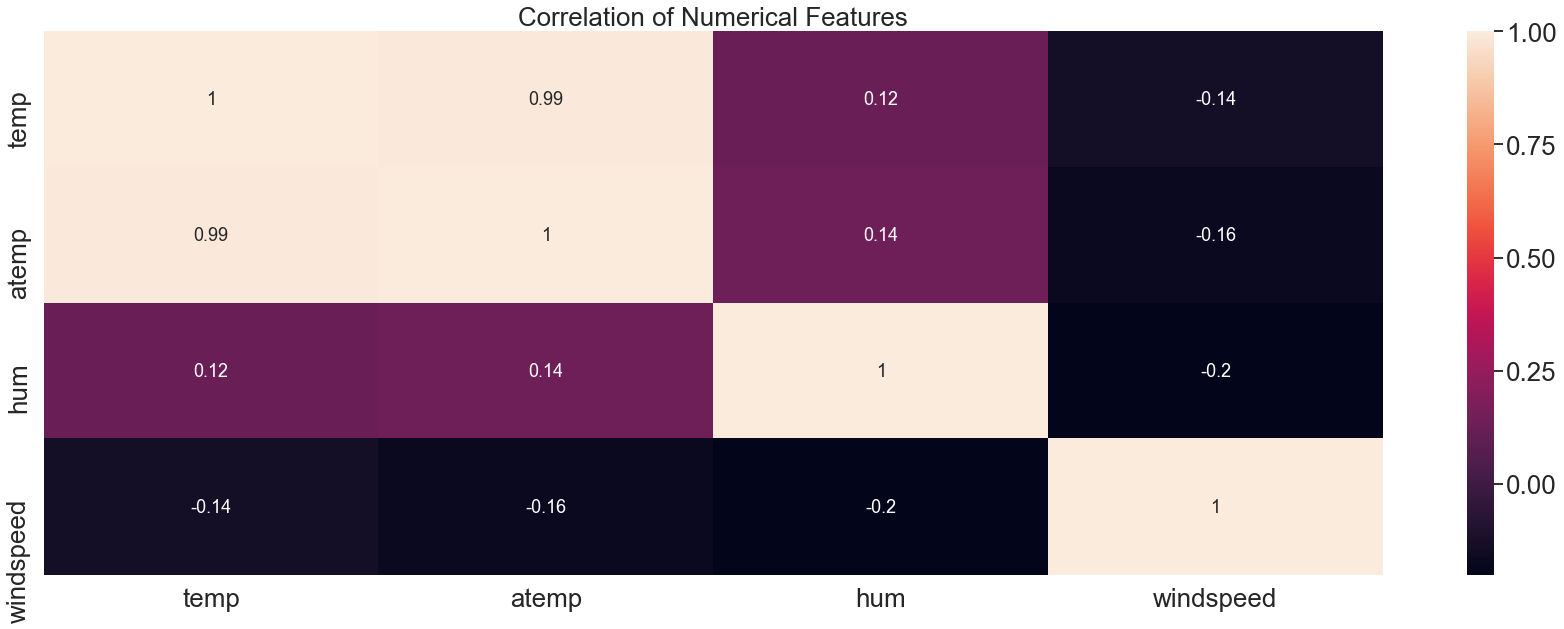

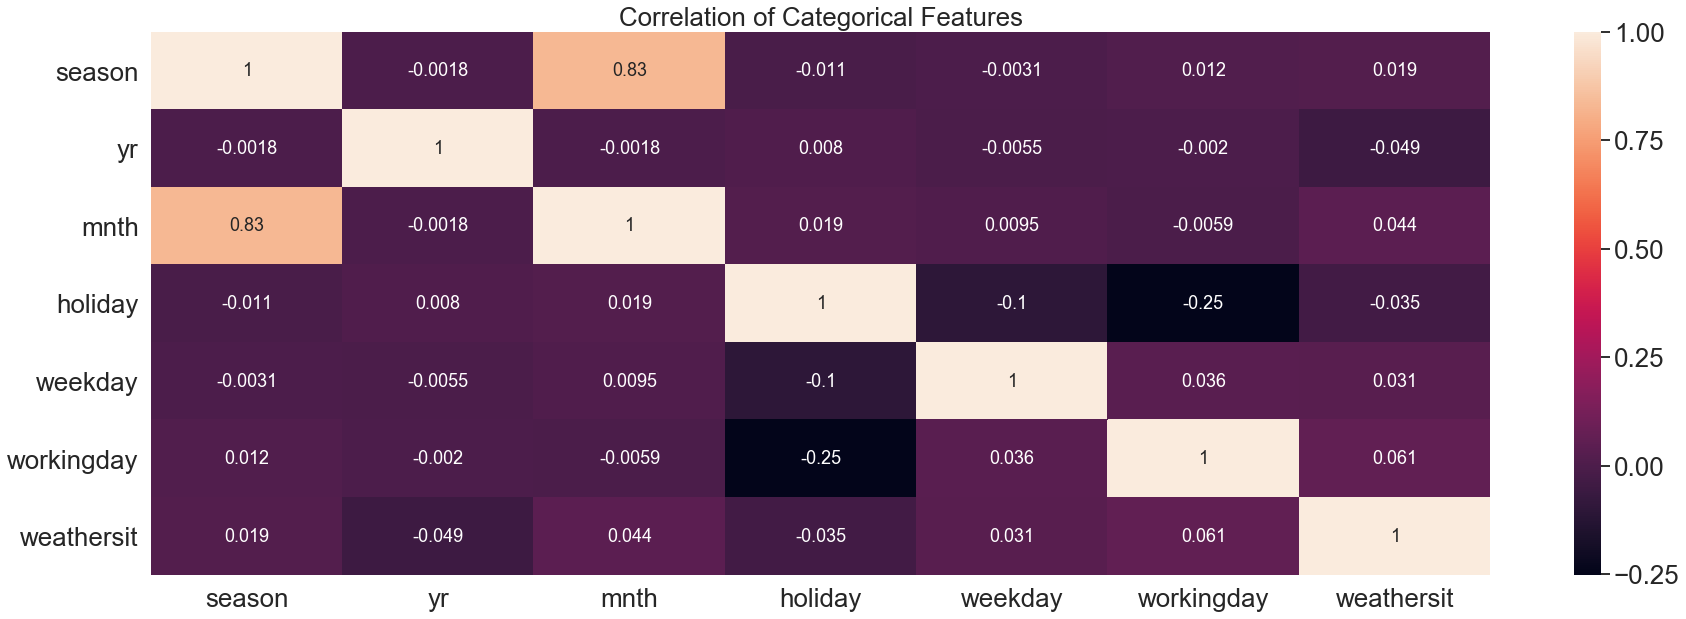

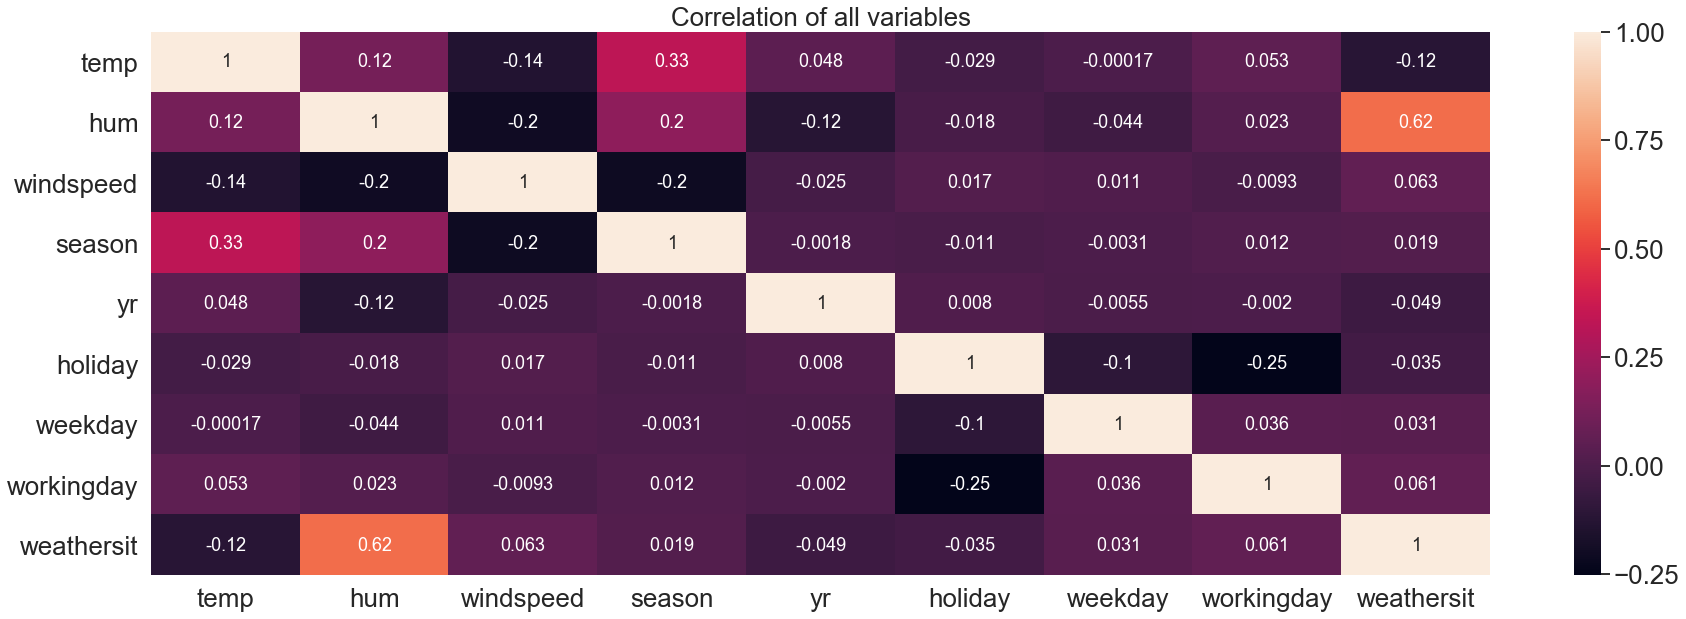

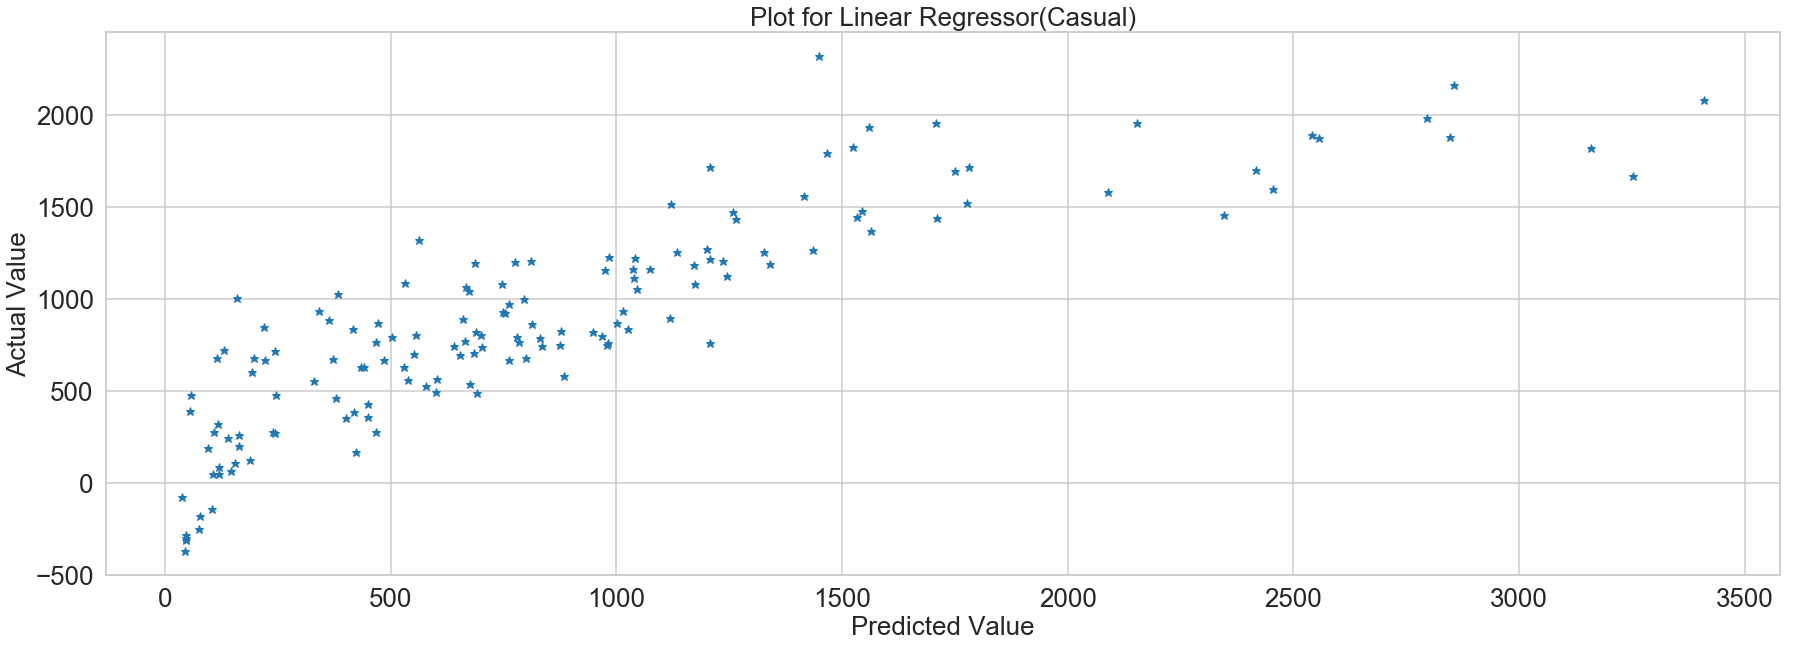

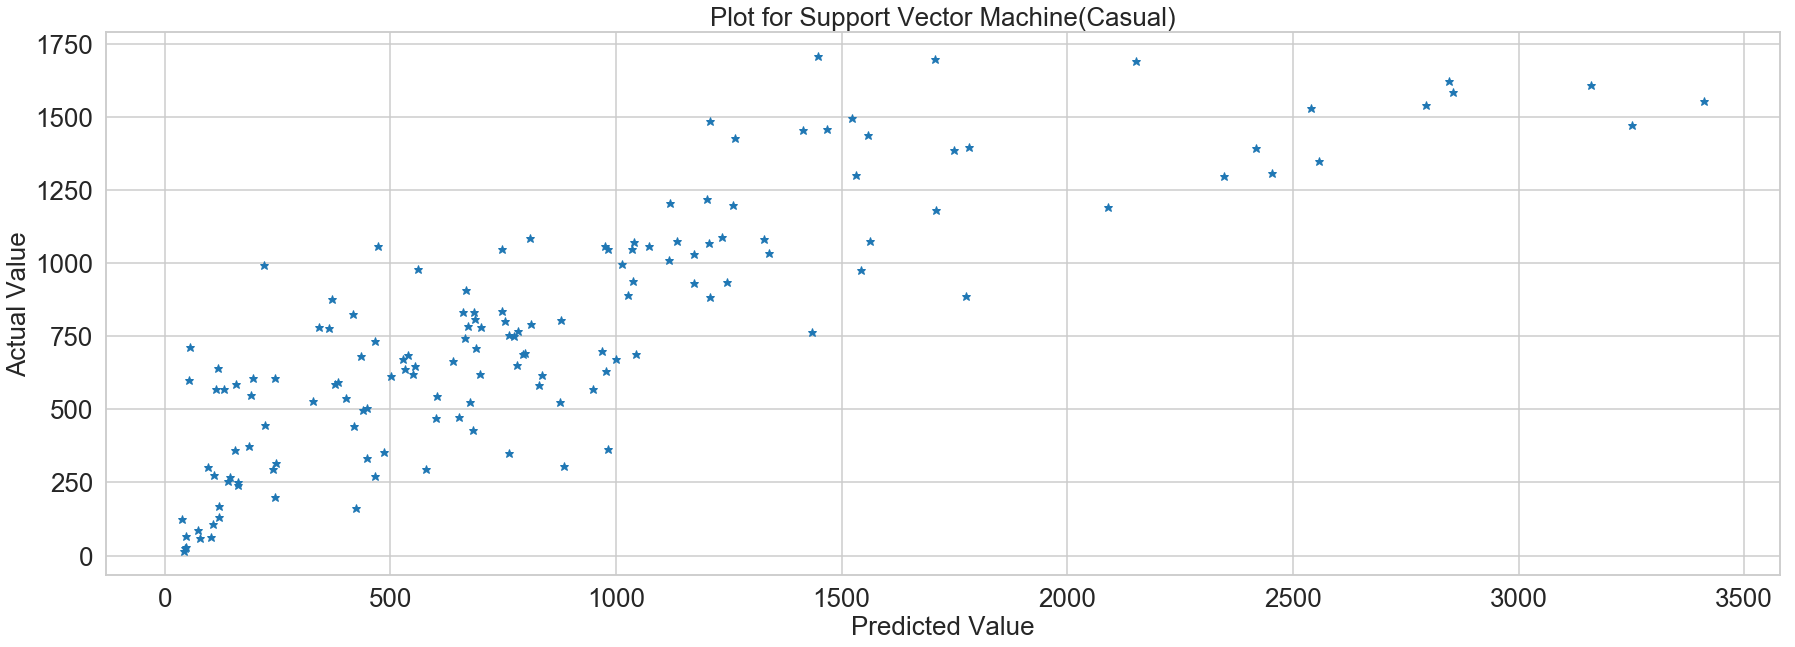

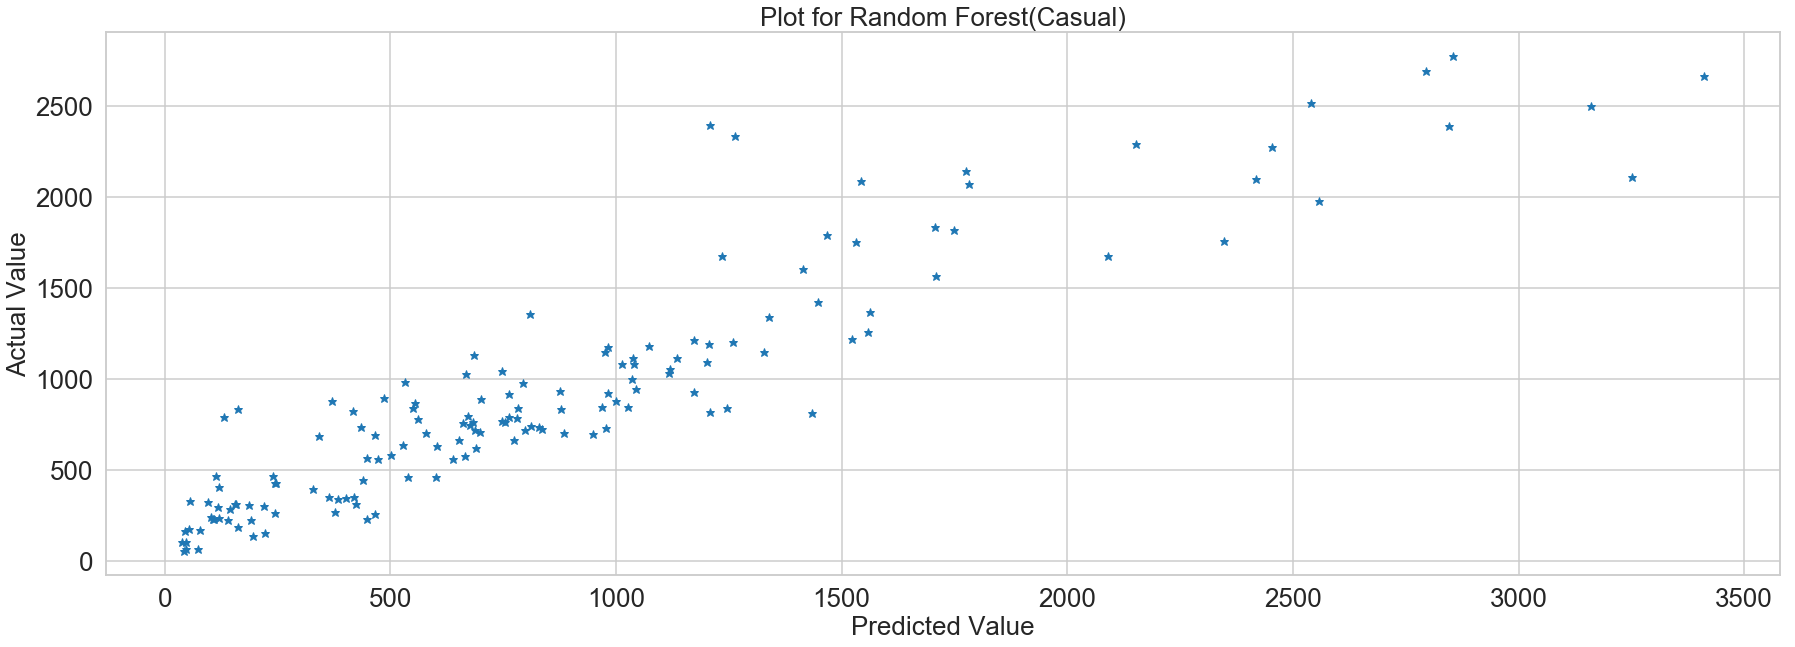

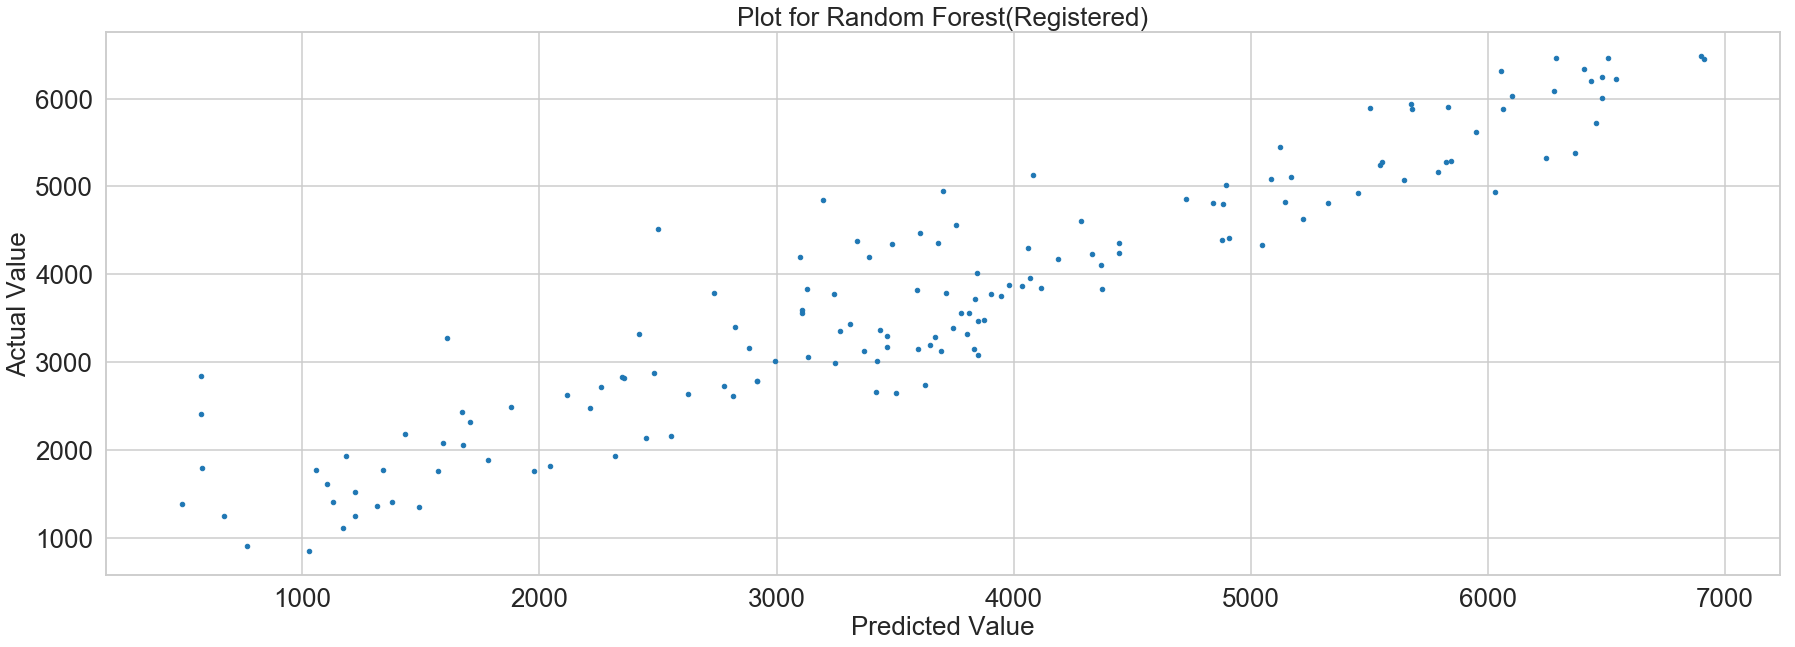

<function matplotlib.pyplot.show(*args, **kw)>

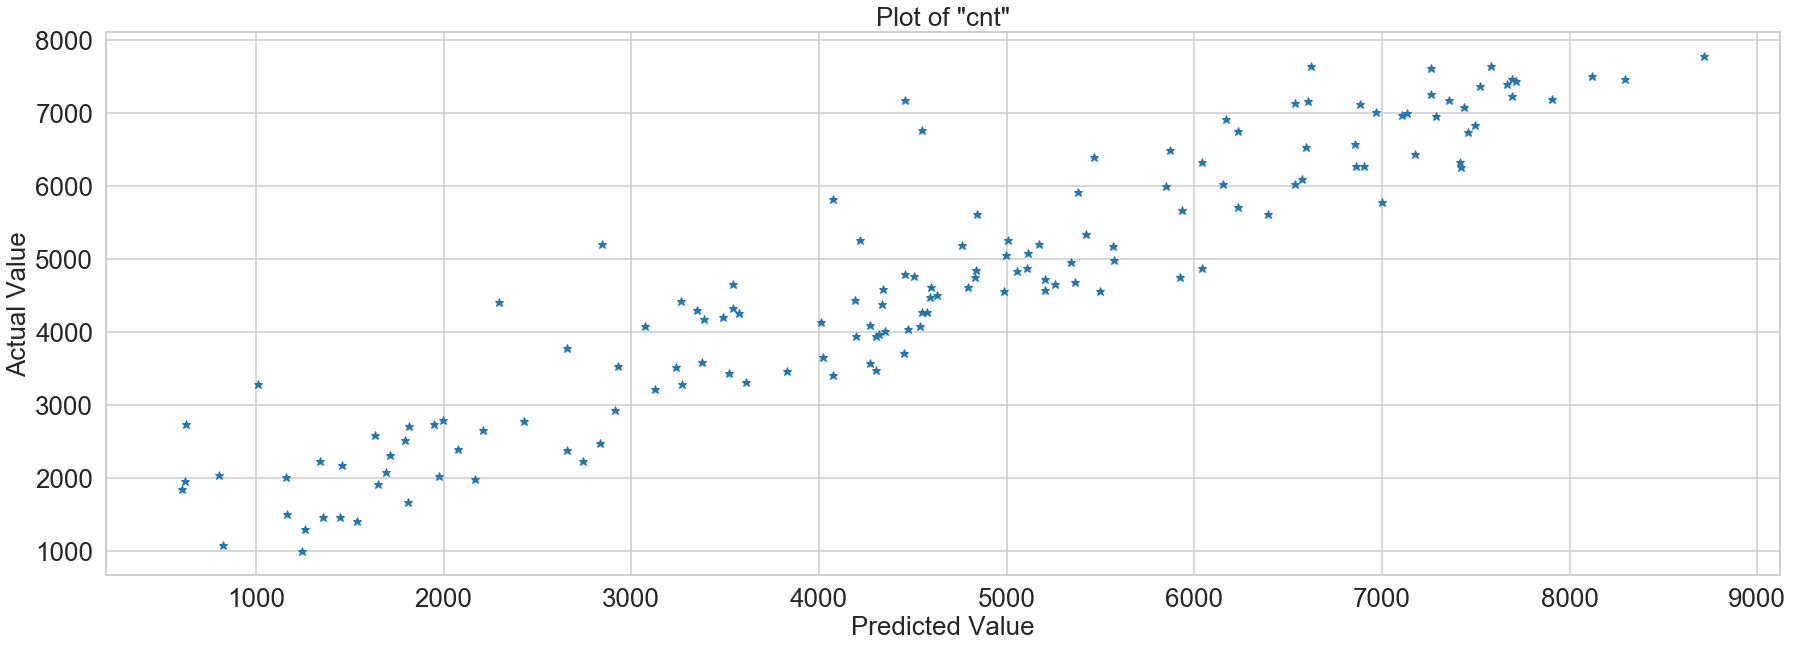

In [52]:
#Importing the data 
df =  pd.read_csv("../dataset/Bike-Sharing-Dataset/day.csv")
#Taking a quick look at the data 
df.head()
#Checking the dimension of the data
df.shape
#Looking at all the unique values in the column
df.nunique()

df.describe()
#Checking in there are any null values in the columns and their data types
df.info()

#Converting the dteday column which is of type object to datetime64
df['dteday']=df['dteday'].astype('datetime64')

#To plot a timeseries plot using date to check the dependent variables
#Start of plotting timeseries plot
#New dataframe to include only date and dependent variables
timeSeriesDf = df[['dteday', 'casual', 'registered', 'cnt']]
#Setting date as index
timeSeriesDf.set_index('dteday', inplace = True)
#Timeseries plot
timeSeriesDf.asfreq('W').plot(figsize = (20,10), linewidth = 2, fontsize = 20)
plt.xlabel('731 days', fontsize = 20)
plt.title('Timeseries: 2011-2012')
plt.show()
#End of plotting timeseries plot

#As the instant columns in just the index removing them won't effect
df.drop(columns=['instant'], inplace = True)
#Setting date as index in original dataframe for a new dataframe which might be useful in future
dfDate = df.set_index('dteday')

#Taking the df.columns result and storing them in a list
columns = df.columns.tolist()
#Specifying all the categorical columns
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
                       'weathersit']
#removing all the categorical columns from columns list leaving all the numerical variables
numerical_columns = list(set(columns) - set(categorical_columns))
numerical_columns.remove('dteday')
numerical_columns.remove('cnt')
numerical_columns.remove('registered')
numerical_columns.remove('casual')

#Plotting all the numerical columns data to check the distribution
for i in range(len(numerical_columns)):
    column = numerical_columns[i]
    if(column != 'dteday'):
        print (column)
        sns.distplot(df[column])
        plt.title(column)
        plt.show()
        
       
#As the numerical columns was scaled using min max scaler we will remove all the outliers
#beacuse min max is sensitive to the outliers
#Boxplot before removing the ouliers
for i in range(len(numerical_columns)):
    column = numerical_columns[i]
    if(column != 'dteday'):
        print (column)
        sns.boxplot(df[column])
        plt.title(column)
        plt.show()
 #declaring y just to know how many outliers were updated
y=0
#checking for the outliers and replacing it with median
for i in range(len(numerical_columns)):
    column = numerical_columns[i]
    print(column)
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    lowerFence = q1 - (1.5*(q3-q1))
    upperFence = q3 + (1.5*(q3-q1))
    df_temp = df[column]
    for i in range(len(df[column])):
        if(lowerFence> df_temp[i] or df_temp[i] > upperFence):
            df_temp[i] = df_temp.median()
            y+=1
    print(y)
#Bolplot after removing the outliers
for i in range(len(numerical_columns)):
    column = numerical_columns[i]
    if(column != 'dteday'):
        print (column)
        sns.boxplot(df[column])
        plt.title(column)
        plt.show()
        
##They have used min max scaler
 #Checking the correlation of the features
#All Numerical variables       
corr = df[numerical_columns].corr()
sns.heatmap(corr, annot = True)
plt.title('Correlation of Numerical Features')
plt.show()
df.drop(columns = ['atemp'], inplace = True)
numerical_columns.remove('atemp')

#All categorical variables
corr = df[categorical_columns].corr()
sns.heatmap(corr, annot = True)
plt.title('Correlation of Categorical Features')
plt.show()
df.drop(columns = ['mnth'], inplace = True)
categorical_columns.remove('mnth')
#All the variables 
listll = numerical_columns + categorical_columns
corr = df[listll].corr()
sns.heatmap(corr, annot = True)
plt.title('Correlation of all variables')
plt.show()
df.drop(columns = ['hum'], inplace = True)
df.drop(columns = ['dteday'], inplace = True)

#
X=df.iloc[:, :-3].values
y=df.iloc[:, -3:].values
#We will predict casual and registered seperately
#Now all we need to do is seperate the data for casual and registered
#use one hot encoder
onehotencoder = OneHotEncoder(categorical_features= [0, 3, 5])
X = onehotencoder.fit_transform(X).toarray()
#To avoid dummy variable trap
X = np.delete(X, [3, 10, 13], axis = 1)

#Splitting the training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Fitting Linear Regression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train[:,0])

y_casual_pred = lineReg.predict(X_test)

lineR2 = r2_score(y_test[:, 0], y_casual_pred)
linearMSE = mean_squared_error(y_test[:, 0], y_casual_pred)


plt.plot(y_test[:, 0], y_casual_pred, "*")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Plot for Linear Regressor(Casual)')
plt.show()

#Fitting SVM

svReg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svReg.fit(X_train, y_train[:,0])

y_casual_svr = svReg.predict(X_test)
svrR2 = r2_score(y_test[:, 0], y_casual_svr)
svrMSE = mean_squared_error(y_test[:, 0], y_casual_svr)

plt.plot(y_test[:, 0], y_casual_svr, "*")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Plot for Support Vector Machine(Casual)')
plt.show()

#Fitting Random Forest Regressor

rFReg = RandomForestRegressor(n_estimators= 150, max_depth = 200, random_state= 0)
rFReg.fit(X_train, y_train[:, 0])

y_casual_rf = rFReg.predict(X_test)
rfR2 = r2_score(y_test[:, 0], y_casual_rf)
rfMSE = mean_squared_error(y_test[:, 0], y_casual_rf)

plt.plot(y_test[:, 0], y_casual_rf, "*")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Plot for Random Forest(Casual)')
plt.show()

#As Random Forest seems to be the best fit, will fit for regular too
rFReg.fit(X_train, y_train[:, 1])

y_regular_rf = rFReg.predict(X_test)
rfRegularR2 = r2_score(y_test[:, 1], y_regular_rf)
rfRegularMSE = mean_squared_error(y_test[:, 1], y_casual_rf)
rfRegularMEA = mean_absolute_error(y_test[:, 1], y_casual_rf)
rfRegularRMSE = np.sqrt(rfRegularMSE)

plt.plot(y_test[:,1], y_regular_rf,'.')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Plot for Random Forest(Registered)')
plt.show()

#Now adding both regular and casual and looking at the plot of cnt
y_cnt_rf = y_regular_rf + y_casual_rf

plt.plot(y_test[:, 2], y_cnt_rf, '*')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Plot of "cnt"')
plt.show


In [53]:
#fitting xgboost
#Tried to fit xgboost but seems unstable as it clears the memory whenever run
#Might work on lower python version(current python version 3.7)
import xgboost as xgb
dtrain=xgb.DMatrix(X_train, y_train[:, 0])
our_params = {'eta':0.1, 'seed':0, 'subsample':0.8, 'colsample_bytree':0.8}
final_gb = xgb.train(our_params, dtrain)
dtest  = xgb.DMatrix(X_test)
y_casual_xgb=final_gb.predict(dtest)
rfXgb = r2_score(y_test[:, 0], y_casual_xgb)

C:\Users\nle5257\projects\.vritualenv\win_virtualenv\lib\site-packages\xgboost\core.py:614: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase memory consumption")


In [56]:

xgb_pred = final_gb.predict(dtest)

In [58]:
final_gb.get_fscore()

{'f13': 11,
 'f0': 15,
 'f15': 76,
 'f11': 33,
 'f7': 12,
 'f8': 14,
 'f9': 24,
 'f1': 18,
 'f3': 14,
 'f2': 6,
 'f6': 11,
 'f14': 130,
 'f4': 9,
 'f10': 14,
 'f5': 9,
 'f12': 5}

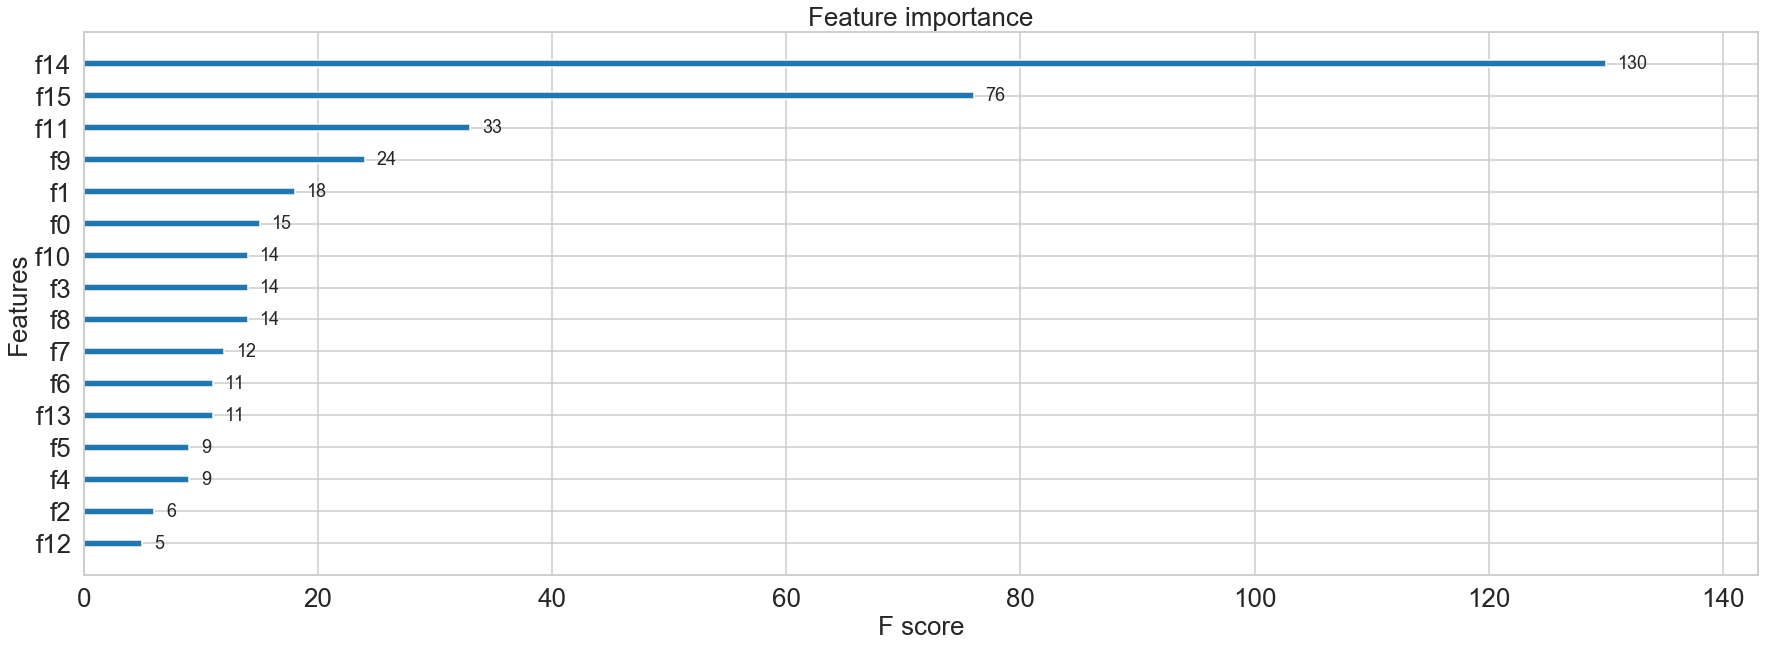

In [62]:
xgb.plot_importance(final_gb)

In [65]:
df.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
0,1,0,0,6,0,2,0.344167,0.160446,331,654,985
1,1,0,0,0,0,2,0.363478,0.248539,131,670,801
2,1,0,0,1,1,1,0.196364,0.248309,120,1229,1349
3,1,0,0,2,1,1,0.200000,0.160296,108,1454,1562
4,1,0,0,3,1,1,0.226957,0.186900,82,1518,1600


In [66]:
def RMSLE(predictions, realizations):
    prediction_use = predictions.clip(0)
    rmsle = np.sqrt(np.mean(np.array(np.log(prediction_use + 1) - np.log(realizations + 1)) **2 ))
    return rmsle

In [73]:
RMSLE(xgb_pred,y_test[:,0])

0.5631077626590918

In [79]:
from pygam import LinearGAM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow

In [82]:
day_data =  pd.read_csv("../dataset/Bike-Sharing-Dataset/day.csv")

In [83]:
feature =['cnt','season','windspeed','atemp','hum','yr','mnth']
Daily_bike_share= pd.DataFrame()
Daily_bike_share = day_data[feature]

In [84]:
Daily_bike_share.head(10)

,cnt,season,windspeed,atemp,hum,yr,mnth
0,985,1,0.160446,0.363625,0.805833,0,1
1,801,1,0.248539,0.353739,0.696087,0,1
2,1349,1,0.248309,0.189405,0.437273,0,1
3,1562,1,0.160296,0.212122,0.590435,0,1
4,1600,1,0.186900,0.229270,0.436957,0,1
5,1606,1,0.089565,0.233209,0.518261,0,1
6,1510,1,0.168726,0.208839,0.498696,0,1
7,959,1,0.266804,0.162254,0.535833,0,1
8,822,1,0.361950,0.116175,0.434167,0,1
9,1321,1,0.223267,0.150888,0.482917,0,1


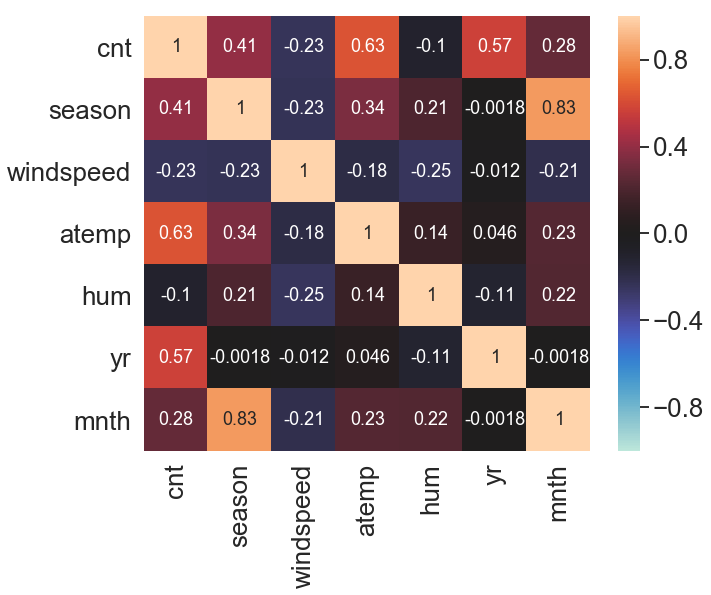

In [85]:
correlation = Daily_bike_share.corr()
fig, axes  = plt.subplots(figsize=(10,8))
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,center=0,ax=axes)

In [90]:
# Train_data, test_data = train_test_split(Daily_bike_share, test_size = 0.2)

# X_train = Train_data.drop(columns = ["cnt"])
# y_train = Train_data[['cnt']]
# ########################################
# X_test = test_data.drop(columns = ["cnt"])
# y_test = test_data[['cnt']]
# gam = LinearGAM(n_splines=10).gridsearch(X_train, y_train)